https://aroussi.com/post/python-yahoo-finance

In [ ]:
# https://aroussi.com/post/python-yahoo-finance
import yfinance as yf
# apple and amazon
data = yf.download("AAPL AMZN", start="2016-10-01", end="2017-04-30",
                   group_by="ticker")
print(data)


/tmp/ipython-input-2466902754.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL AMZN", start="2016-10-01", end="2017-04-30",
[*********************100%***********************]  2 of 2 completed

Ticker           AMZN                                                   AAPL  \
Price            Open       High        Low      Close     Volume       Open   
Date                                                                           
2016-10-03  41.799999  41.993000  41.562500  41.837002   55388000  25.870373   
2016-10-04  42.045502  42.118500  41.513000  41.701500   59006000  25.950705   
2016-10-05  41.900002  42.283501  41.806000  42.217999   69382000  26.028741   
2016-10-06  42.185001  42.360500  42.029999  42.083000   53680000  26.097605   
2016-10-07  42.289501  42.297501  41.872501  41.971500   48524000  26.237618   
...               ...        ...        ...        ...        ...        ...   
2017-04-24  45.433998  45.499500  45.191002  45.370499   62458000  33.250257   
2017-04-25  45.352001  45.473999  45.150002  45.381001   67612000  33.345271   
2017-04-26  45.514999  45.787498  45.377998  45.464500   52178000  33.475014   
2017-04-27  45.719501  46.092999  45.605

In [ ]:
pip install yfinance pandas numpy matplotlib scikit-learn torch

In [ ]:
import yfinance as yf, pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
# https://gist.github.com/yashveersinghsohi/060d1dc1311142f387d1c0ba8267e230
# for dowloading S&P 500
TICKERS = ["AAPL","MSFT","GOOGL","AMZN","META","NVDA","TSLA","SPY", "^GSPC"]
START, END = "2015-01-01", None

data = yf.download(" ".join(TICKERS), start=START, end=END, auto_adjust=True, actions=True)

stacked = (data.stack(level=1)
        .rename_axis(index=["Date","Ticker"])
        .reset_index()
        .sort_values(["Ticker","Date"]))

stacked['Ticker'] = stacked['Ticker'].replace('^GSPC', 'S&P 500')

summary = (stacked
      .assign(Return=lambda d: d.groupby("Ticker")["Close"].pct_change())
      .groupby("Ticker")
      .agg(n_days=("Date","nunique"),
          start=("Date","min"), end=("Date","max"),
          mean_ret=("Return","mean"), vol_ret=("Return","std"),
          ann_vol=("Return", lambda x: x.std()*np.sqrt(252)),
          avg_dollar_vol=("Close", "mean")))

[*********************100%***********************]  9 of 9 completed
/tmp/ipython-input-3914225585.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked = (data.stack(level=1)


In [ ]:
summary

n_days      start        end  mean_ret   vol_ret   ann_vol  \
Ticker                                                                
AAPL       2717 2015-01-02 2025-10-21  0.001045  0.018295  0.290425   
AMZN       2717 2015-01-02 2025-10-21  0.001196  0.020735  0.329154   
GOOGL      2717 2015-01-02 2025-10-21  0.000994  0.018140  0.287962   
META       2717 2015-01-02 2025-10-21  0.001108  0.023670  0.375743   
MSFT       2717 2015-01-02 2025-10-21  0.001088  0.017005  0.269951   
NVDA       2717 2015-01-02 2025-10-21  0.002654  0.030788  0.488739   
S&P 500    2717 2015-01-02 2025-10-21  0.000501  0.011339  0.180007   
SPY        2717 2015-01-02 2025-10-21  0.000567  0.011265  0.178821   
TSLA       2717 2015-01-02 2025-10-21  0.001920  0.036508  0.579550   

         avg_dollar_vol  
Ticker                   
AAPL         103.422588  
AMZN         109.595452  
GOOGL         90.106324  
META         254.421260  
MSFT         201.332051  
NVDA          30.045234  
S&P 500     3557.171420  
SPY          332.796961  
TSLA         131.939488

In [ ]:
print(stacked.columns)

Index(['Date', 'Ticker', 'Capital Gains', 'Close', 'Dividends', 'High', 'Low',
       'Open', 'Stock Splits', 'Volume'],
      dtype='object', name='Price')


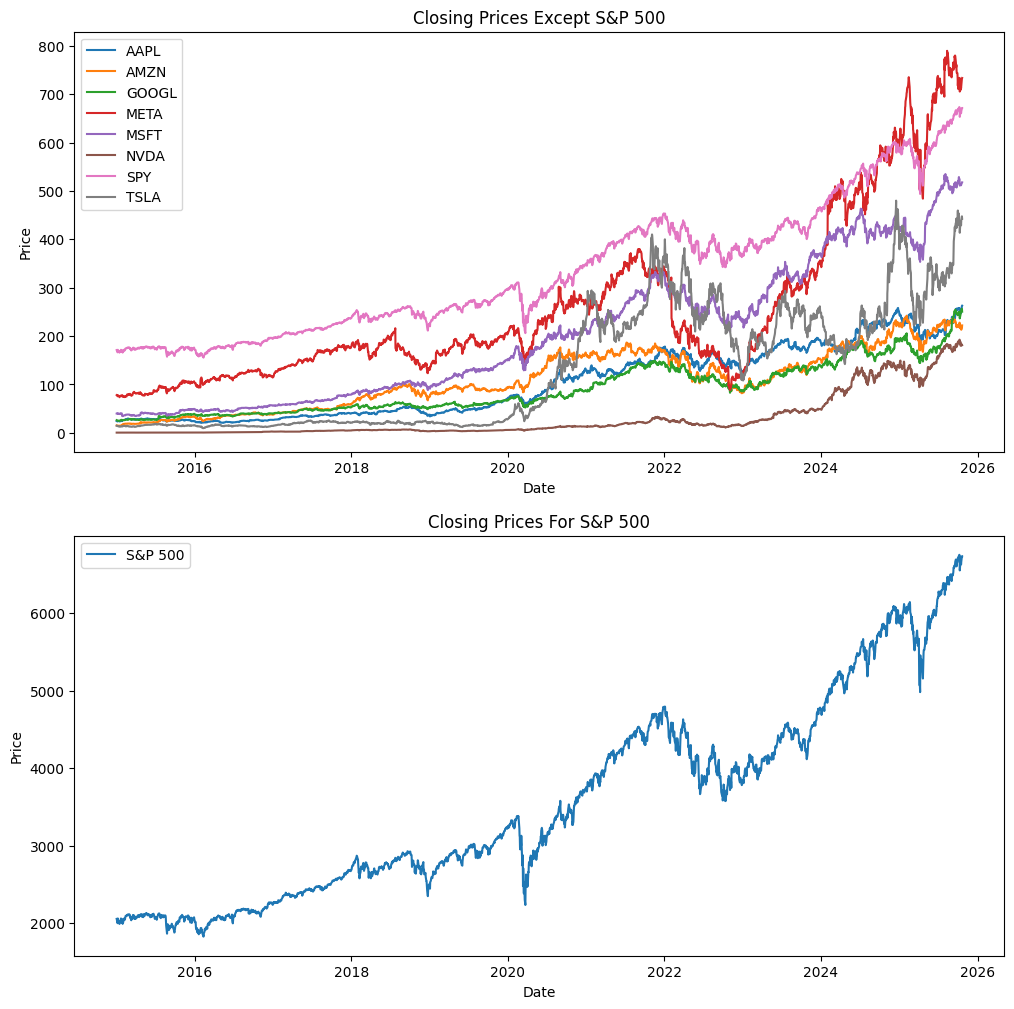

In [ ]:
# import matplotlib.pyplot as plt

# Find the right price column
# price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
# if not price_cols:
#     price_cols = [c for c in stacked.columns if "close" in c.lower()]  # fallback
# price_col = price_cols[0]  # take the first match

# plt.figure(figsize=(12,6))
# for ticker in stacked["Ticker"].unique():
#     subset = stacked[stacked["Ticker"] == ticker]
#     plt.plot(subset["Date"], subset[price_col], label=ticker)

# plt.title("Closing Prices")
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.legend()
# plt.show()
import matplotlib.pyplot as plt

# Find the right price column
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]  # fallback
price_col = price_cols[0]  # take the first match

fig, axes = plt.subplots(2, 1, figsize=(12, 12))
# plt.figure(figsize=(12,6))
all_tickers = stacked["Ticker"].unique()
all_tickers_no_sp = np.delete(all_tickers, np.where(all_tickers == 'S&P 500'))

for ticker in all_tickers_no_sp:
    subset = stacked[stacked["Ticker"] == ticker]
    axes[0].plot(subset["Date"], subset[price_col], label=ticker)

axes[0].set_title('Closing Prices Except S&P 500')
axes[0].legend()
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Price")

subset = stacked[stacked["Ticker"] == 'S&P 500']
axes[1].plot(subset["Date"], subset[price_col], label='S&P 500')
axes[1].set_title('Closing Prices For S&P 500')
axes[1].legend()
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Price")
# plt.title("Closing Prices")
plt.show();

This plot shows how different companies’ stock prices change over time. Each line is a company, with dates on the bottom and prices on the side. You can quickly see which stocks go up, which ones move together, and which ones are more stable or jumpy. It’s basically a simple way to compare how the stocks have done in the past.

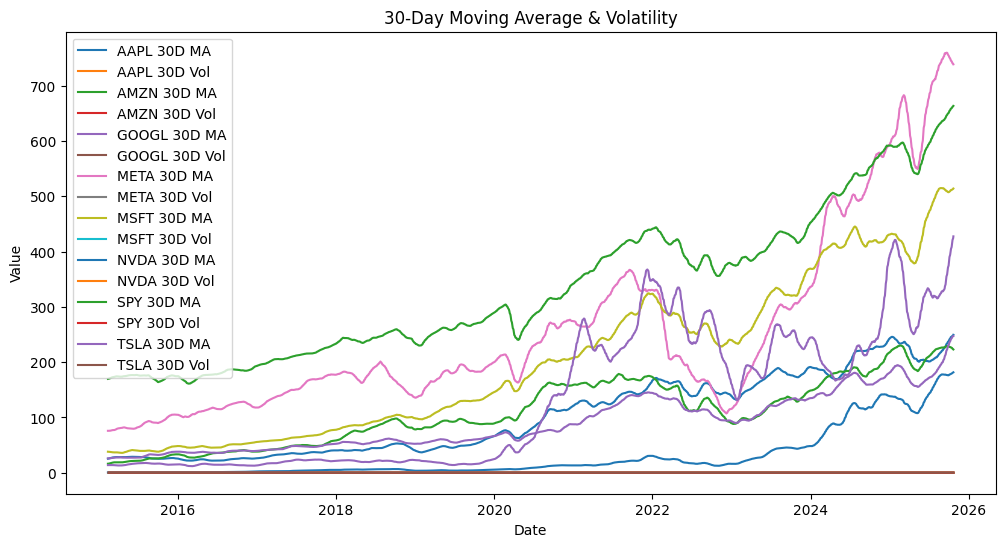

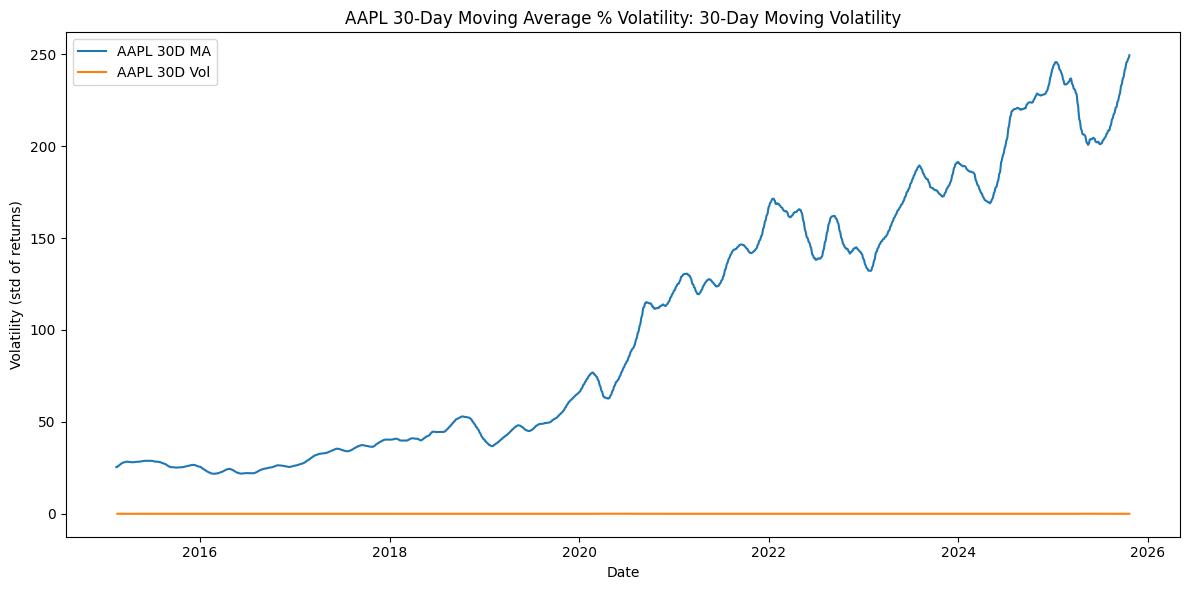

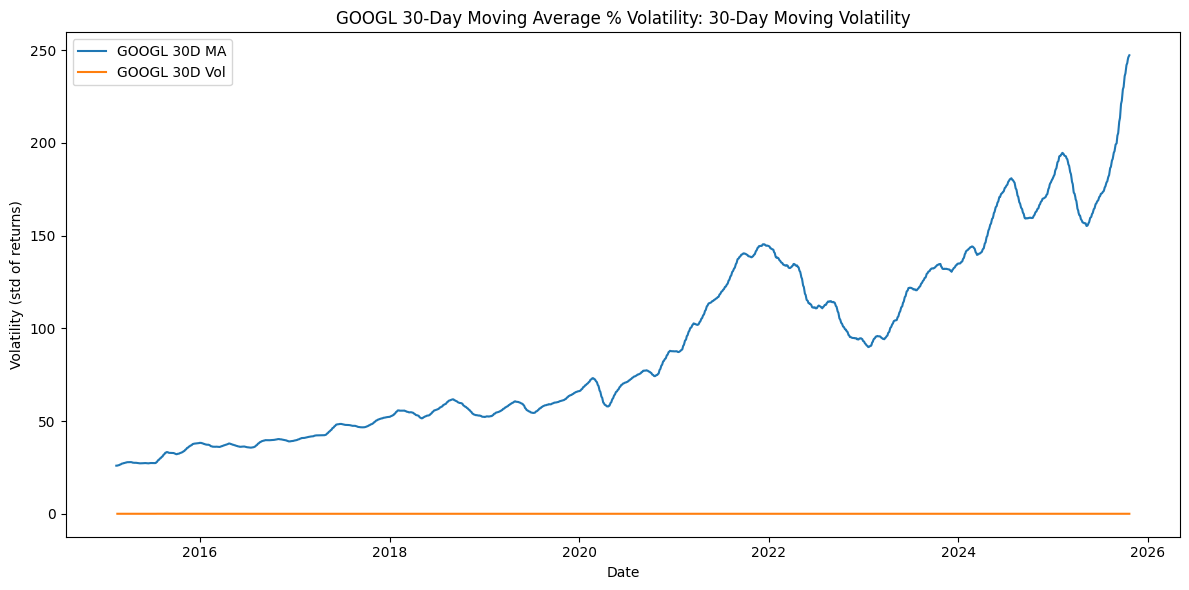

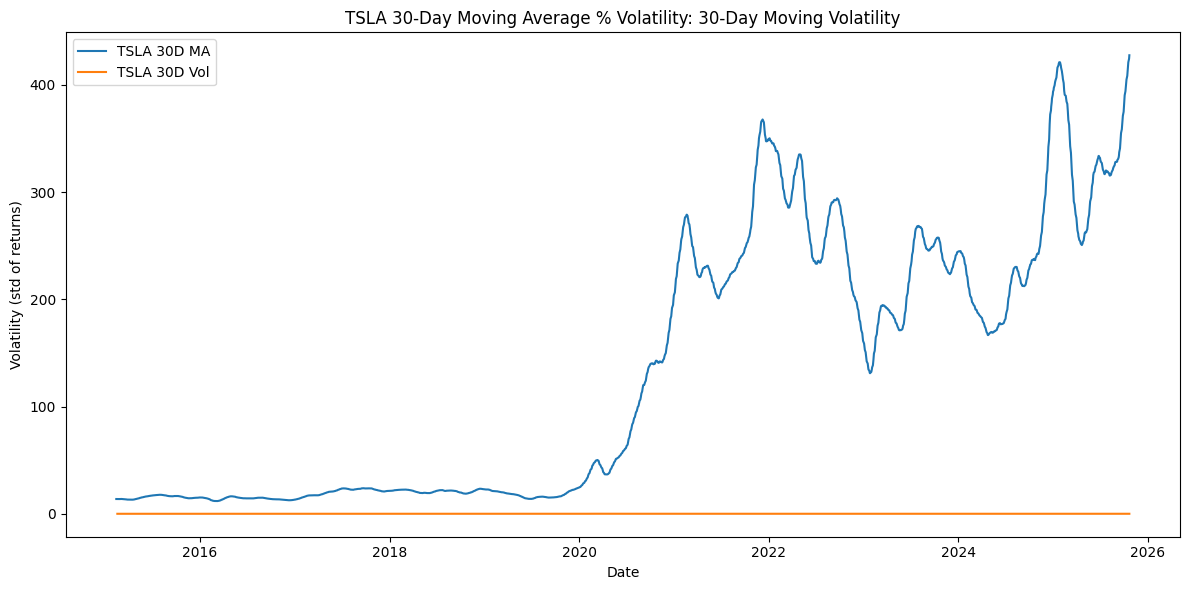

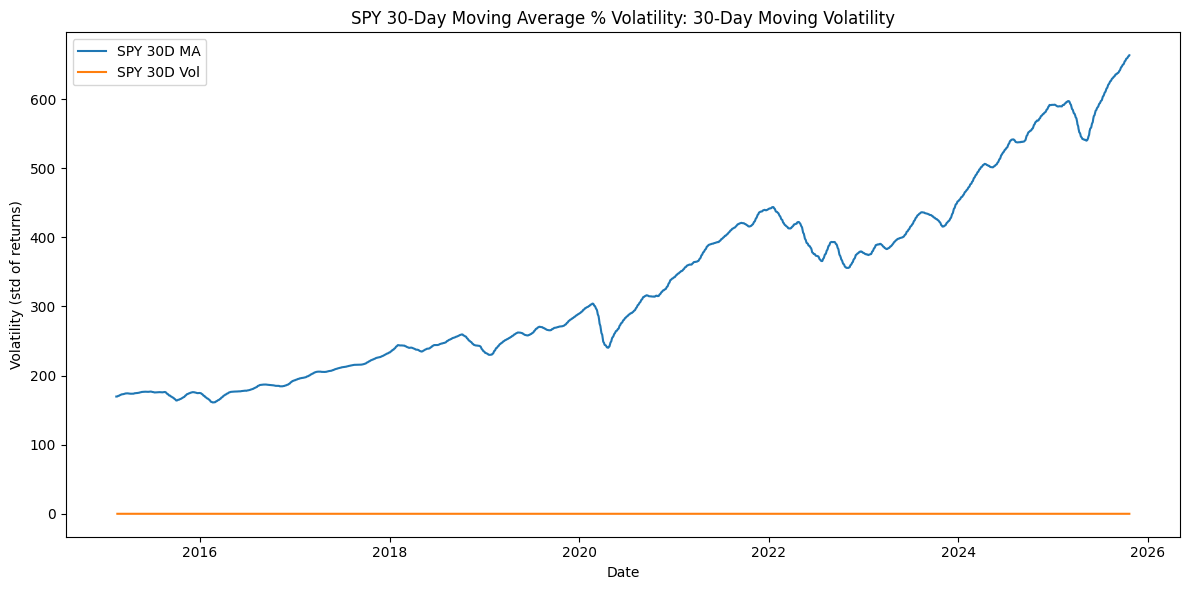

In [ ]:
import matplotlib.pyplot as plt

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in all_tickers_no_sp:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


target = "AAPL 30-Day Moving Average % Volatility"

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

#
subset = stacked[stacked["Ticker"] == "AAPL"].copy()

# Rolling 30-day moving average of price
subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

# Rolling 30-day volatility = std dev of daily returns
subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

# Plot the two series
plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"AAPL {window}D MA")

plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"AAPL {window}D Vol")
#

plt.title(f"{target}: {window}-Day Moving Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (std of returns)")
plt.legend()
plt.tight_layout()
plt.show()








target = "GOOGL 30-Day Moving Average % Volatility"

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

#
subset = stacked[stacked["Ticker"] == "GOOGL"].copy()

# Rolling 30-day moving average of price
subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

# Rolling 30-day volatility = std dev of daily returns
subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

# Plot the two series
plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"GOOGL {window}D MA")

plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"GOOGL {window}D Vol")
#

plt.title(f"{target}: {window}-Day Moving Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (std of returns)")
plt.legend()
plt.tight_layout()
plt.show()







target = "TSLA 30-Day Moving Average % Volatility"

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

#
subset = stacked[stacked["Ticker"] == "TSLA"].copy()

# Rolling 30-day moving average of price
subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

# Rolling 30-day volatility = std dev of daily returns
subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

# Plot the two series
plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"TSLA {window}D MA")

plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"TSLA {window}D Vol")
#

plt.title(f"{target}: {window}-Day Moving Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (std of returns)")
plt.legend()
plt.tight_layout()
plt.show()




target = "SPY 30-Day Moving Average % Volatility"

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

#
subset = stacked[stacked["Ticker"] == "SPY"].copy()

# Rolling 30-day moving average of price
subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

# Rolling 30-day volatility = std dev of daily returns
subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

# Plot the two series
plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"SPY {window}D MA")

plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"SPY {window}D Vol")
#

plt.title(f"{target}: {window}-Day Moving Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (std of returns)")
plt.legend()
plt.tight_layout()
plt.show()

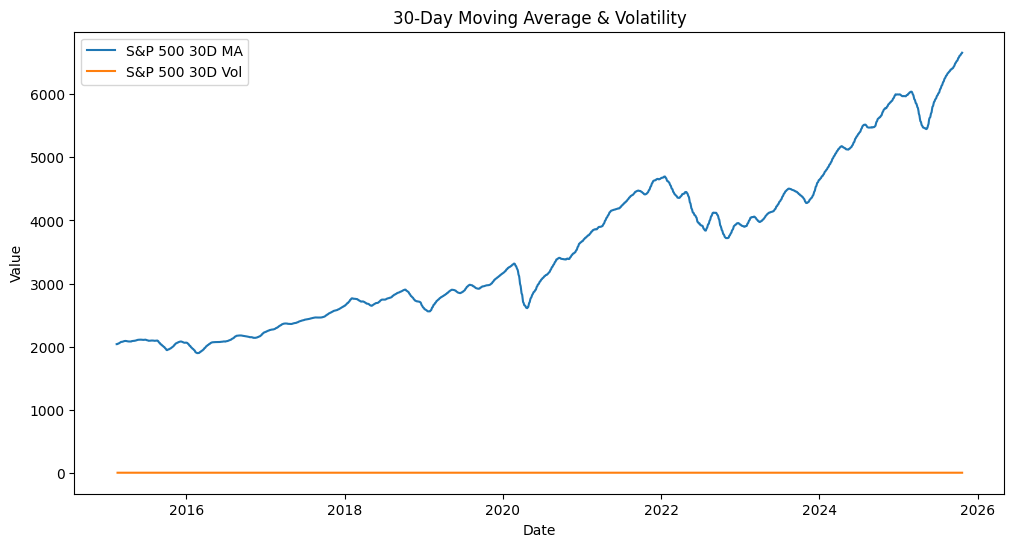

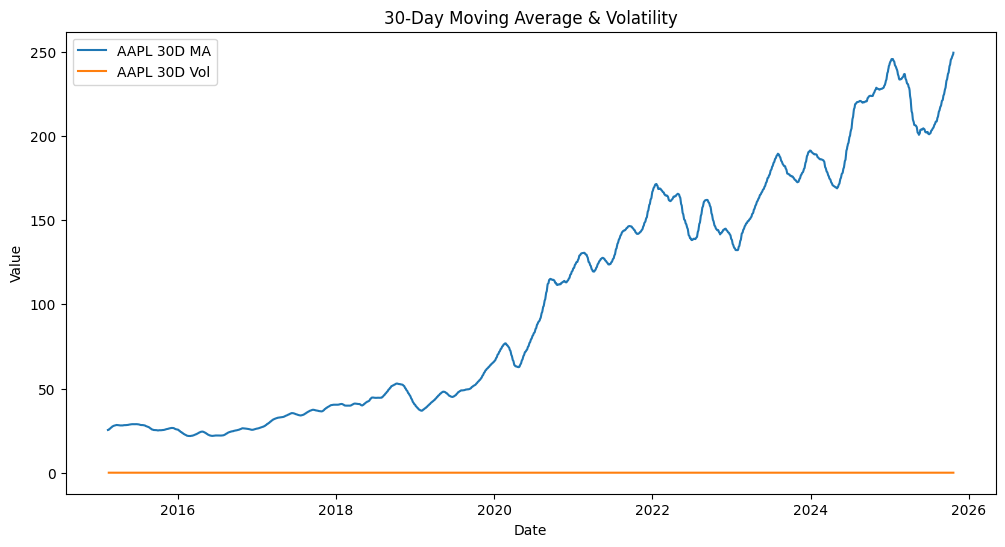

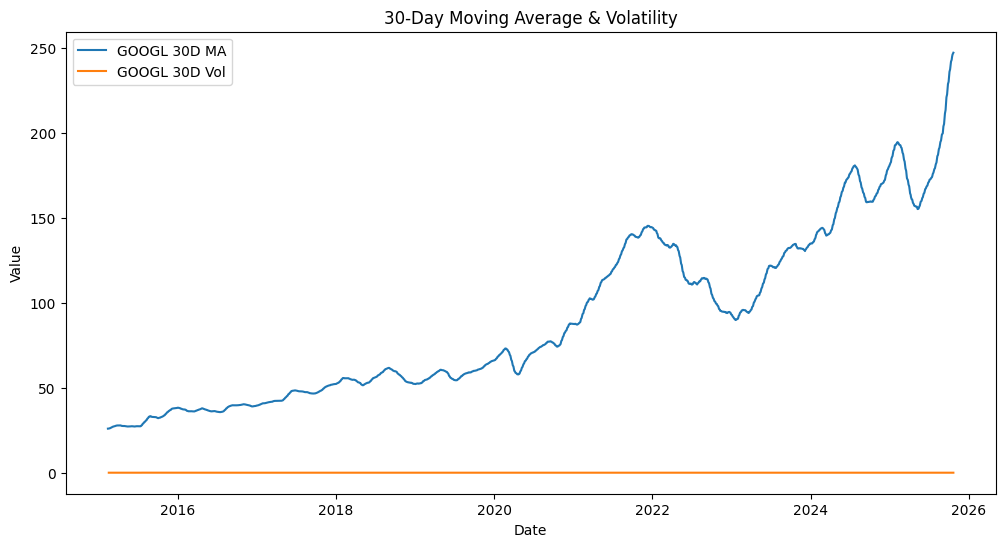

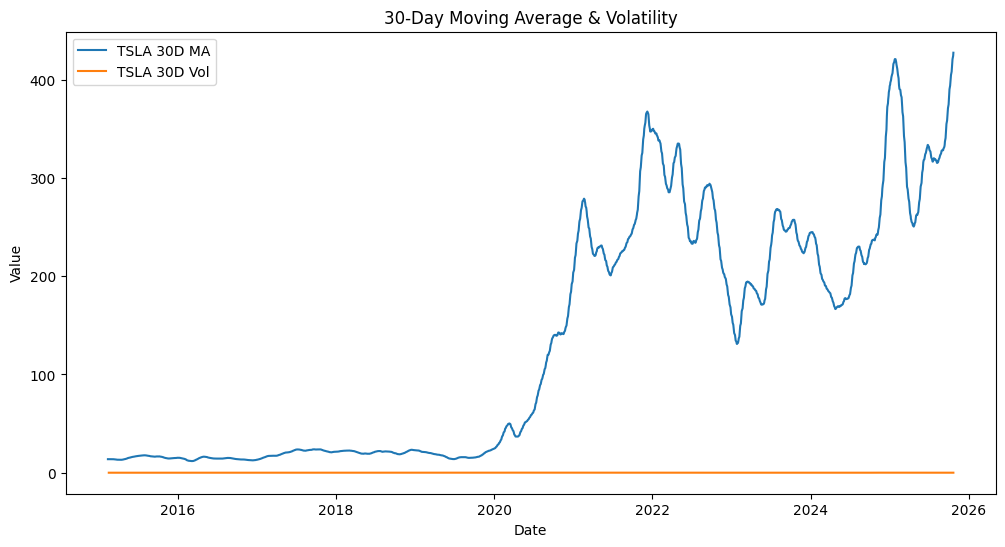

In [ ]:
import matplotlib.pyplot as plt

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in ['S&P 500']:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in ['AAPL']:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()








# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in ['GOOGL']:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()








# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in ['TSLA']:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

this plot shows the moving average of price over 30 days, so we can see the trends without all the daily ups and downs


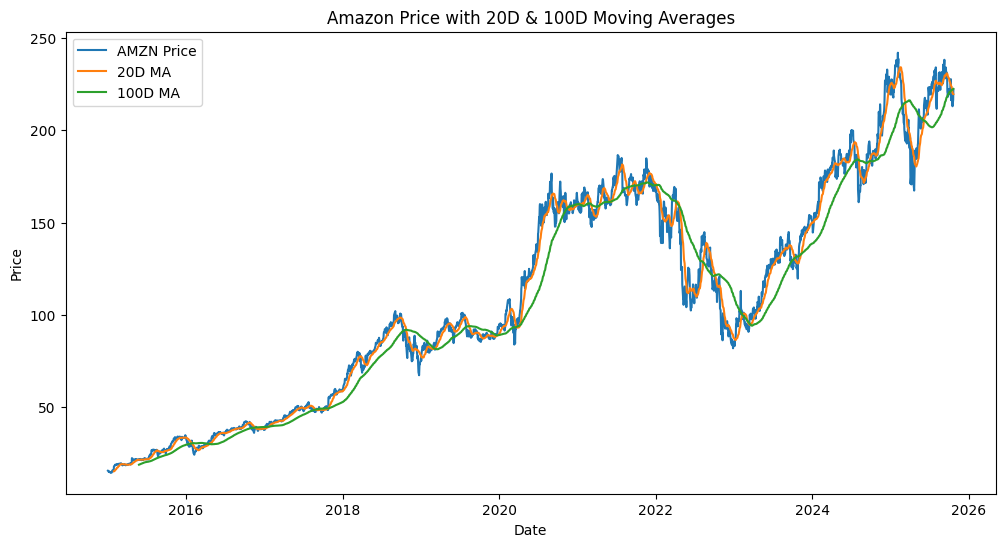

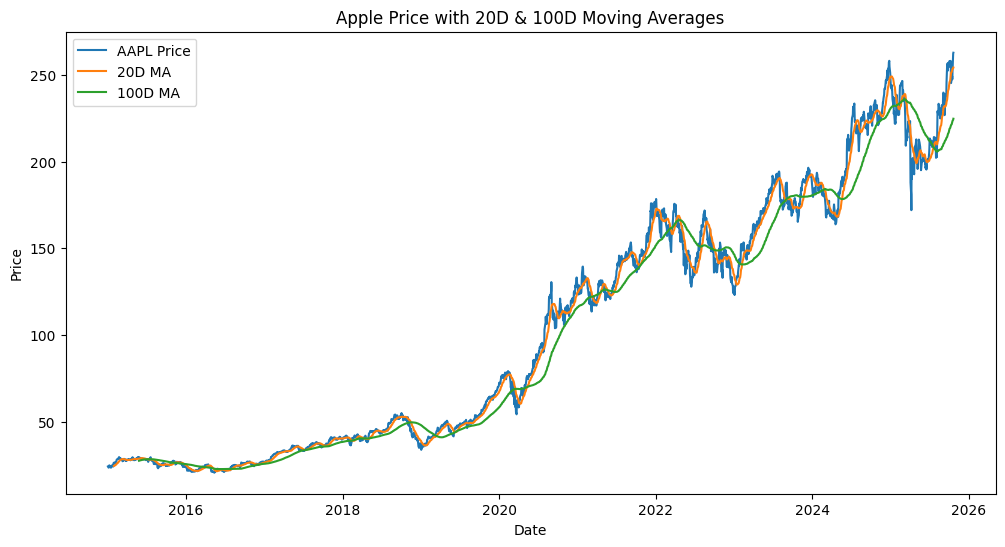

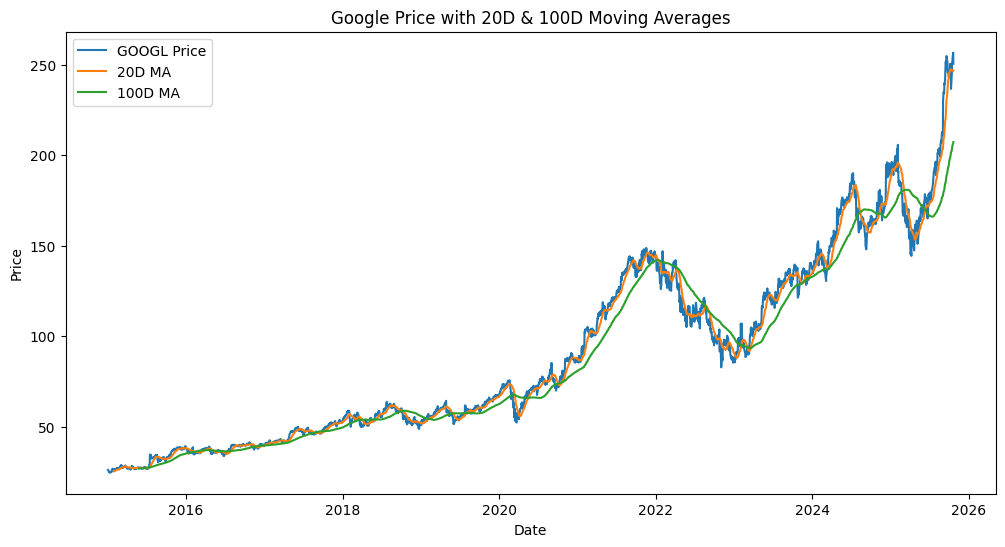

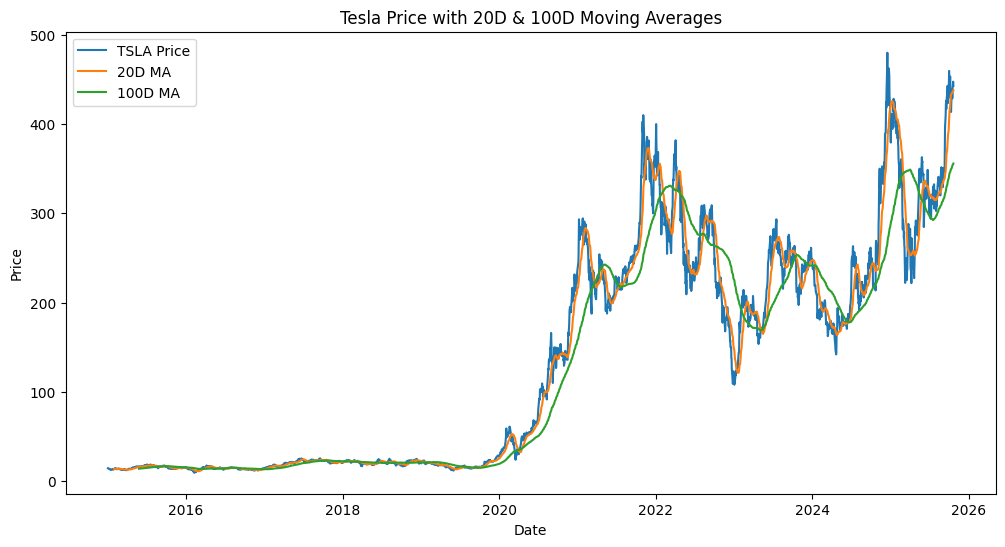

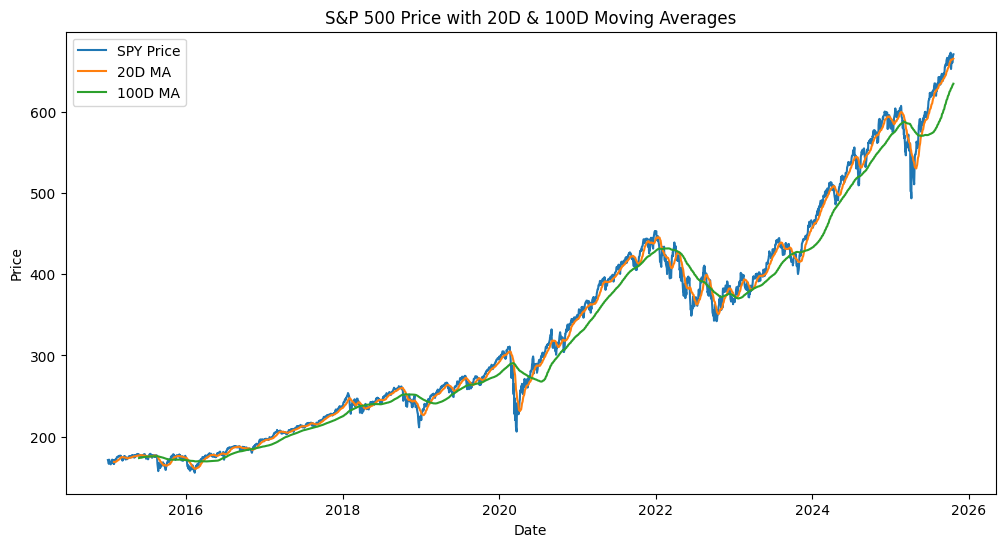

In [ ]:
# price and moving averages for Amazon
amzn = stacked[stacked["Ticker"] == "AMZN"].copy()
amzn["MA20"] = amzn["Close"].rolling(20).mean()
amzn["MA100"] = amzn["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(amzn["Date"], amzn["Close"], label="AMZN Price")
plt.plot(amzn["Date"], amzn["MA20"], label="20D MA")
plt.plot(amzn["Date"], amzn["MA100"], label="100D MA")
plt.title("Amazon Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


aapl = stacked[stacked["Ticker"] == "AAPL"].copy()
aapl["MA20"] = aapl["Close"].rolling(20).mean()
aapl["MA100"] = aapl["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(aapl["Date"], aapl["Close"], label="AAPL Price")
plt.plot(aapl["Date"], aapl["MA20"], label="20D MA")
plt.plot(aapl["Date"], aapl["MA100"], label="100D MA")
plt.title("Apple Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()



googl = stacked[stacked["Ticker"] == "GOOGL"].copy()
googl["MA20"] = googl["Close"].rolling(20).mean()
googl["MA100"] = googl["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(googl["Date"], googl["Close"], label="GOOGL Price")
plt.plot(googl["Date"], googl["MA20"], label="20D MA")
plt.plot(googl["Date"], googl["MA100"], label="100D MA")
plt.title("Google Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


tsla = stacked[stacked["Ticker"] == "TSLA"].copy()
tsla["MA20"] = tsla["Close"].rolling(20).mean()
tsla["MA100"] = tsla["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(tsla["Date"], tsla["Close"], label="TSLA Price")
plt.plot(tsla["Date"], tsla["MA20"], label="20D MA")
plt.plot(tsla["Date"], tsla["MA100"], label="100D MA")
plt.title("Tesla Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


spy = stacked[stacked["Ticker"] == "SPY"].copy()
spy["MA20"] = spy["Close"].rolling(20).mean()
spy["MA100"] = spy["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(spy["Date"], spy["Close"], label="SPY Price")
plt.plot(spy["Date"], spy["MA20"], label="20D MA")
plt.plot(spy["Date"], spy["MA100"], label="100D MA")
plt.title("S&P 500 Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

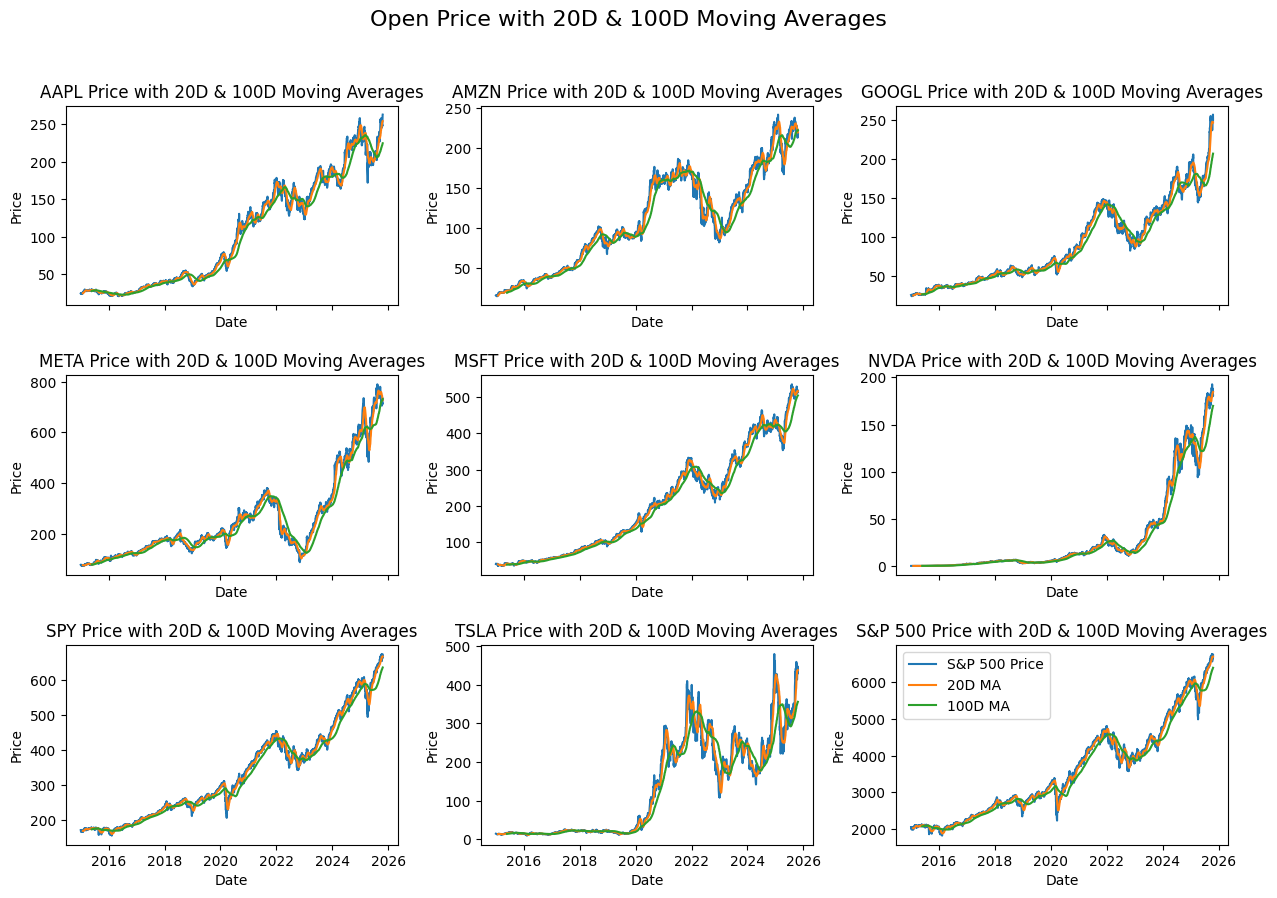

In [ ]:
import math
tickers = stacked["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
  ax = axes[i]
  temp = stacked[stacked["Ticker"] == t].copy()
  temp["MA20"] = temp["Open"].rolling(20).mean()
  temp["MA100"] = temp["Open"].rolling(100).mean()
  ax.plot(temp["Date"], temp["Close"], label= f"{t} Price")
  ax.plot(temp["Date"], temp["MA20"], label="20D MA")
  ax.plot(temp["Date"], temp["MA100"], label="100D MA")
  ax.set_title(f"{t} Price with 20D & 100D Moving Averages")
  ax.set_xlabel("Date")
  ax.set_ylabel("Price")

fig.suptitle("Open Price with 20D & 100D Moving Averages", fontsize=16, y=0.98)
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.legend()
plt.show()

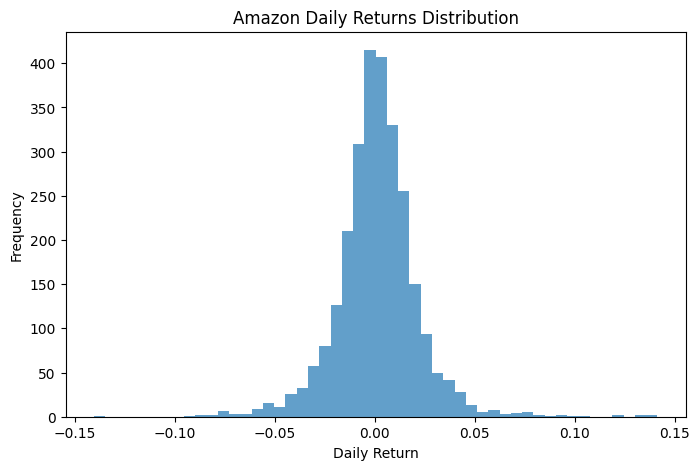

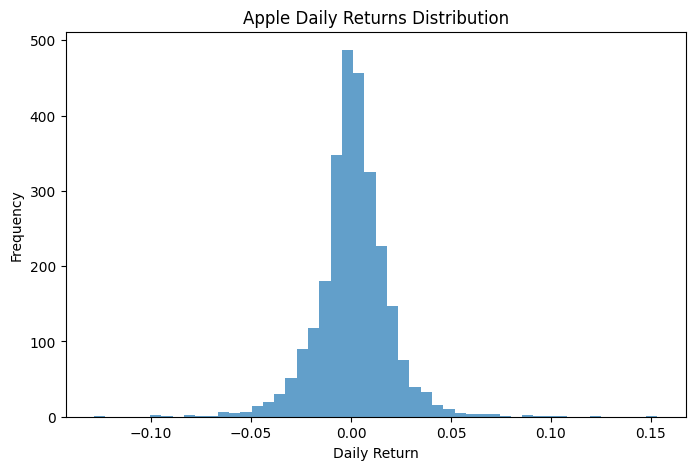

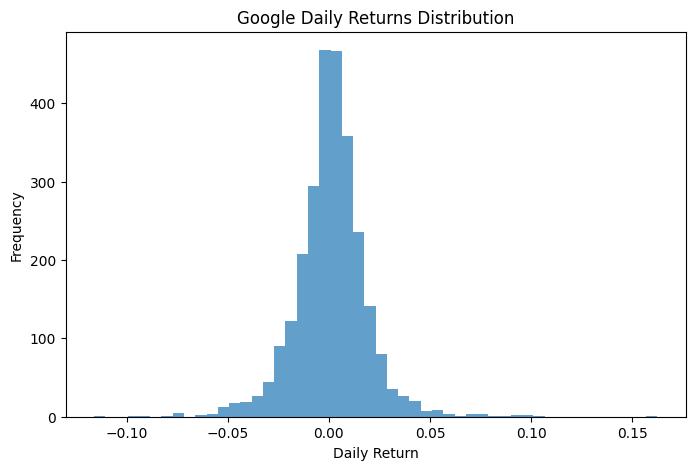

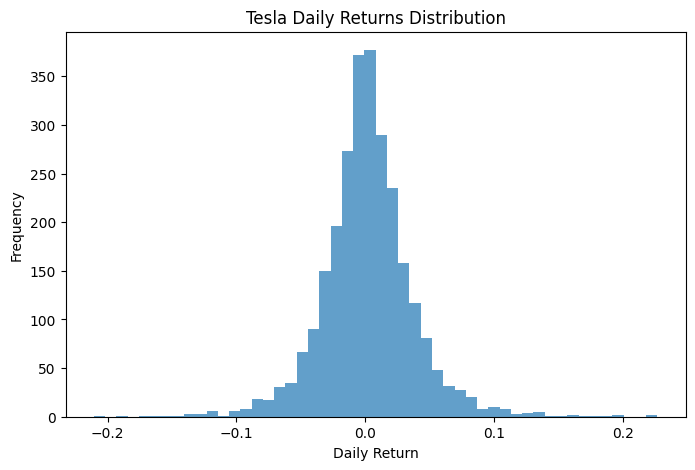

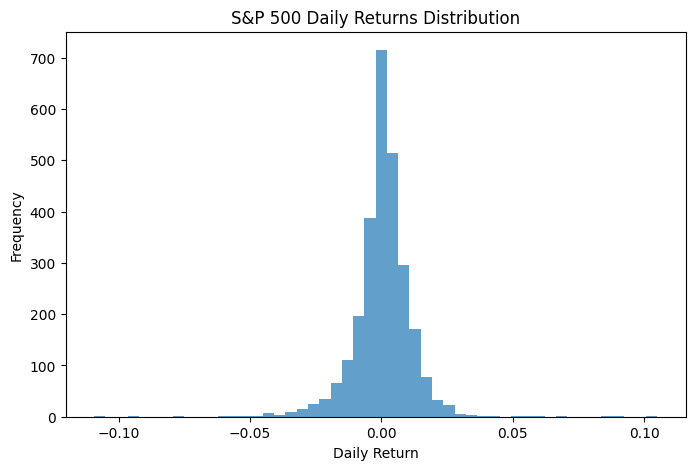

In [ ]:
#Daily Returns Distribution
amzn["Return"] = amzn["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(amzn["Return"].dropna(), bins=50, alpha=0.7)
plt.title("Amazon Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


aapl["Return"] = aapl["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(aapl["Return"].dropna(), bins=50, alpha=0.7)
plt.title("Apple Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()



#Daily Returns Distribution
googl["Return"] = googl["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(googl["Return"].dropna(), bins=50, alpha=0.7)
plt.title("Google Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()



#Daily Returns Distribution
tsla["Return"] = tsla["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(tsla["Return"].dropna(), bins=50, alpha=0.7)
plt.title("Tesla Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()



#Daily Returns Distribution
spy["Return"] = spy["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(spy["Return"].dropna(), bins=50, alpha=0.7)
plt.title("S&P 500 Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-357590628.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


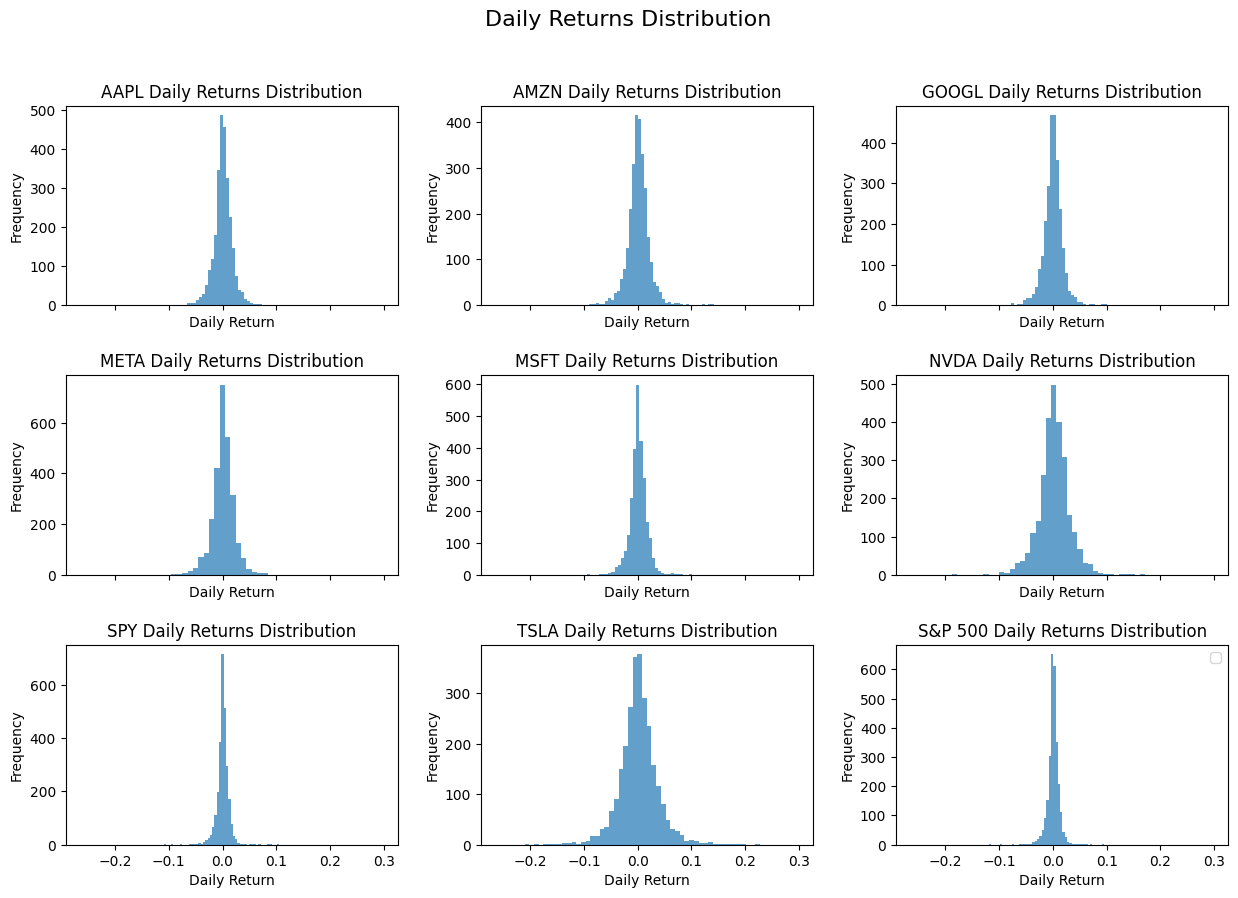

In [ ]:
import math

#Daily Returns Distribution
tickers = stacked["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
  ax = axes[i]
  temp = stacked[stacked["Ticker"] == t].copy()
  temp["Return"] = temp["Close"].pct_change()
  ax.hist(temp["Return"].dropna(), bins=50, alpha=0.7)
  ax.set_title(f"{t} Daily Returns Distribution")
  ax.set_xlabel("Daily Return")
  ax.set_ylabel("Frequency")

fig.suptitle("Daily Returns Distribution", fontsize=16, y=0.98)
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.legend()
plt.show();

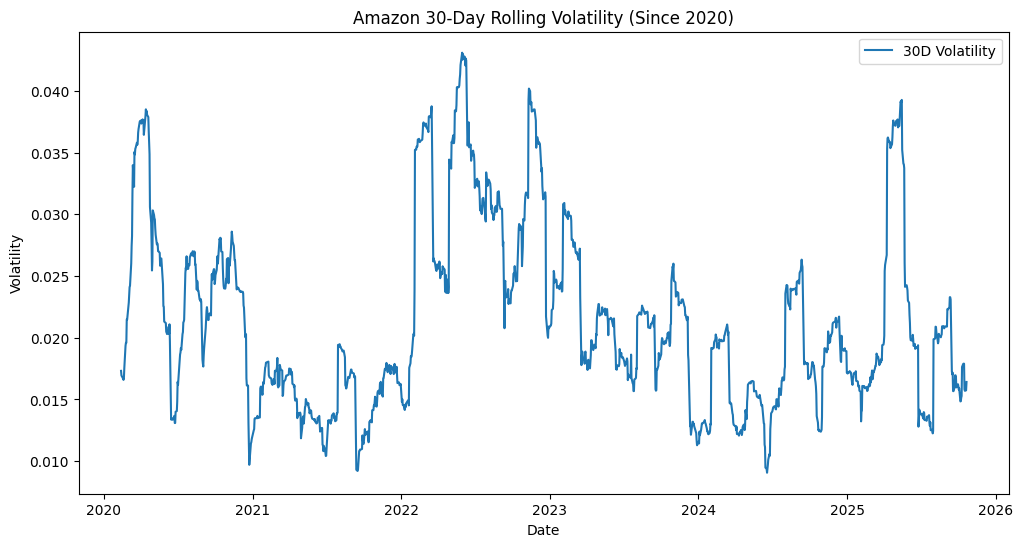

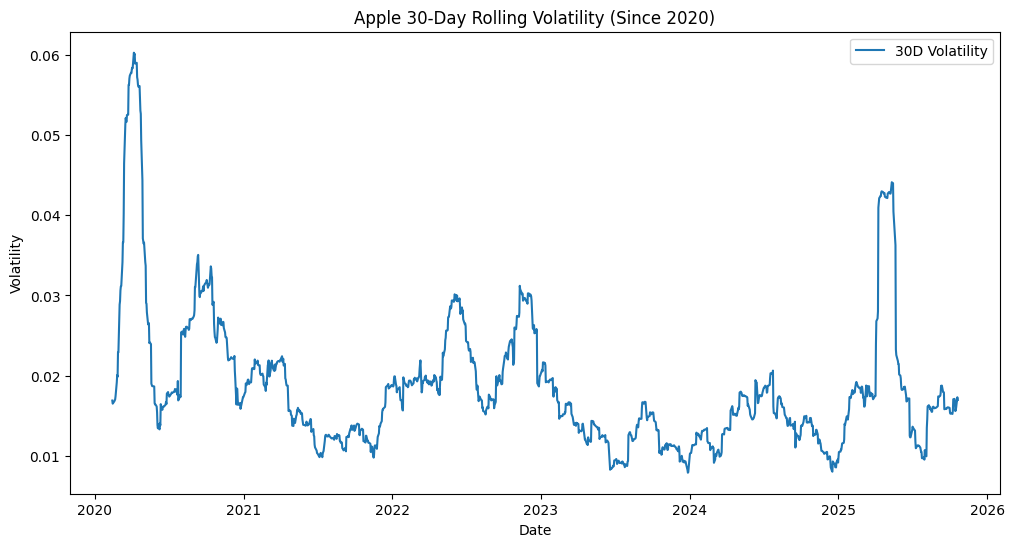

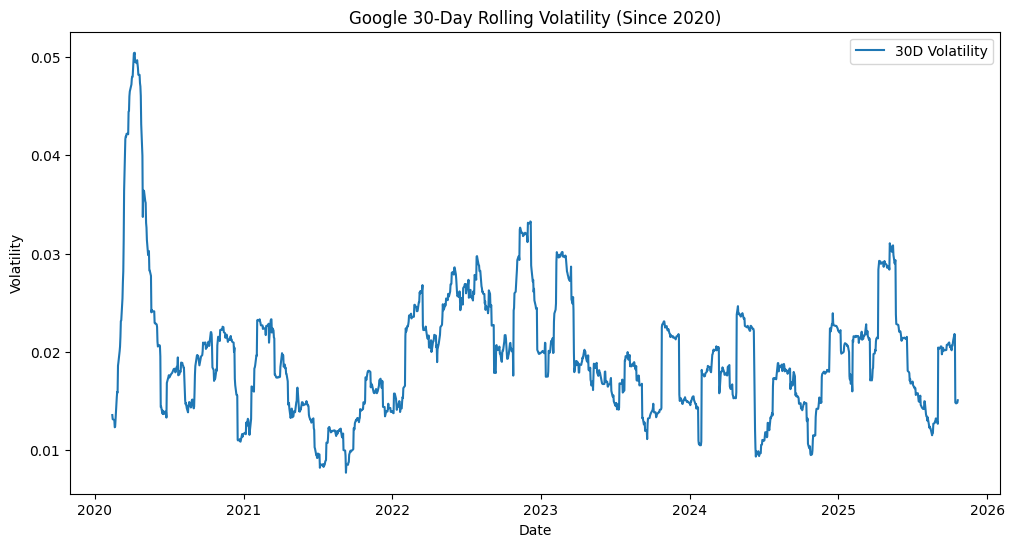

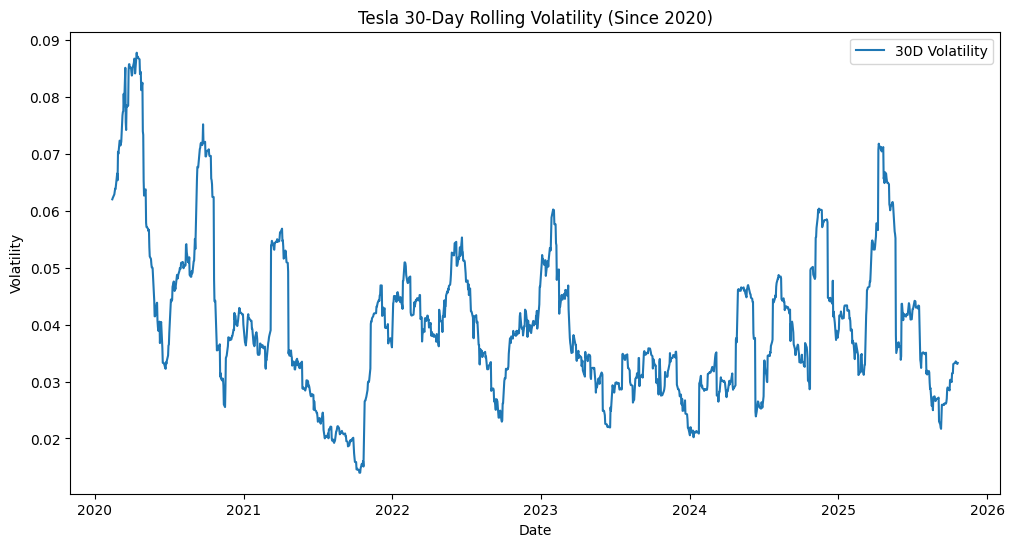

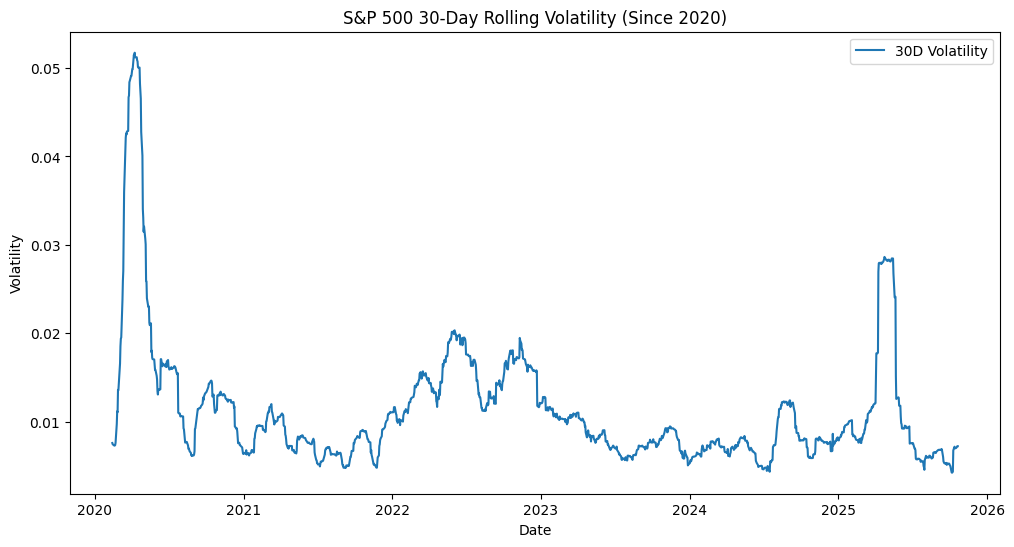

In [ ]:
#Rolling Volatility (since 2020)
amzn_recent = amzn[amzn["Date"] >= "2020-01-01"].copy()
amzn_recent["RollingVol30"] = amzn_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(amzn_recent["Date"], amzn_recent["RollingVol30"], label="30D Volatility")
plt.title("Amazon 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


aapl_recent = aapl[aapl["Date"] >= "2020-01-01"].copy()
aapl_recent["RollingVol30"] = aapl_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(aapl_recent["Date"], aapl_recent["RollingVol30"], label="30D Volatility")
plt.title("Apple 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()



googl_recent = googl[googl["Date"] >= "2020-01-01"].copy()
googl_recent["RollingVol30"] = googl_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(googl_recent["Date"], googl_recent["RollingVol30"], label="30D Volatility")
plt.title("Google 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()



tsla_recent = tsla[tsla["Date"] >= "2020-01-01"].copy()
tsla_recent["RollingVol30"] = tsla_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(tsla_recent["Date"], tsla_recent["RollingVol30"], label="30D Volatility")
plt.title("Tesla 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


spy_recent = spy[spy["Date"] >= "2020-01-01"].copy()
spy_recent["RollingVol30"] = spy_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(spy_recent["Date"], spy_recent["RollingVol30"], label="30D Volatility")
plt.title("S&P 500 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

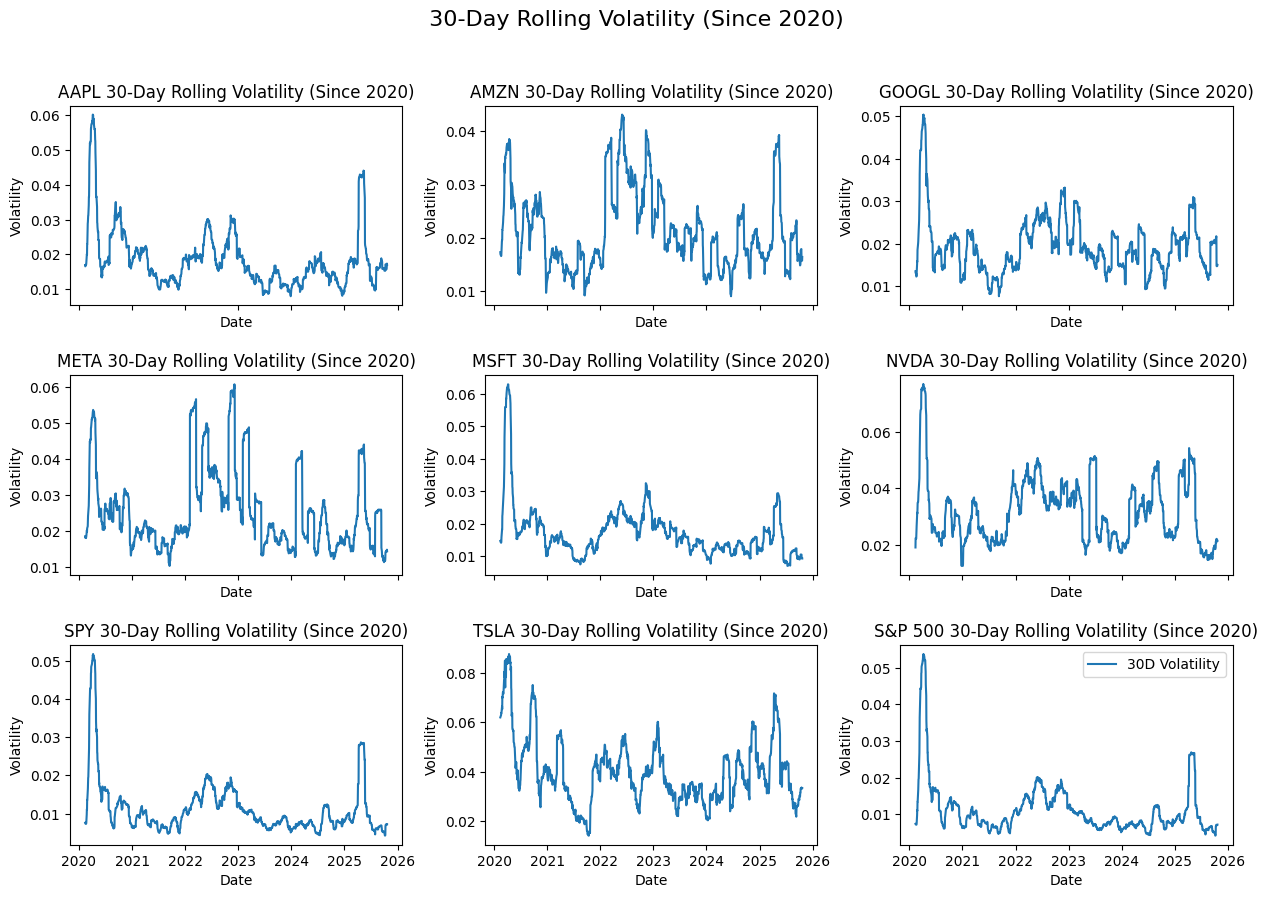

In [ ]:
#Rolling Volatility (since 2020)
tickers = stacked["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
  ax = axes[i]
  temp = stacked[stacked["Ticker"] == t].copy()
  temp["Return"] = temp["Close"].pct_change()
  temp_recent = temp[temp['Date'] >= "2020-01-01"].copy()
  temp_recent["RollingVol30"] = temp_recent["Return"].rolling(30).std()
  ax.plot(temp_recent["Date"], temp_recent["RollingVol30"], label="30D Volatility")
  ax.set_title(f"{t} 30-Day Rolling Volatility (Since 2020)")
  ax.set_xlabel("Date")
  ax.set_ylabel("Volatility")

fig.suptitle(" 30-Day Rolling Volatility (Since 2020)", fontsize=16, y=0.98)
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.legend()
plt.show();

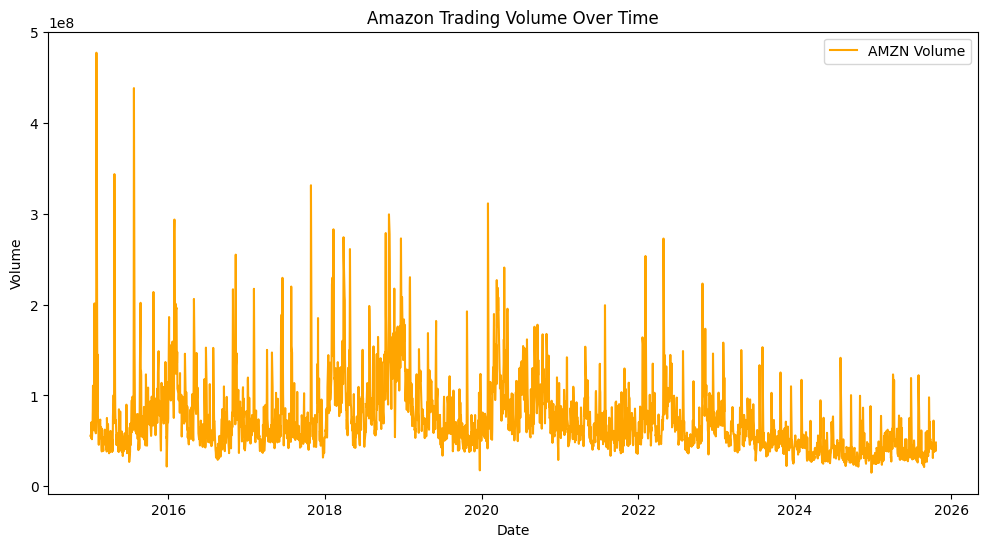

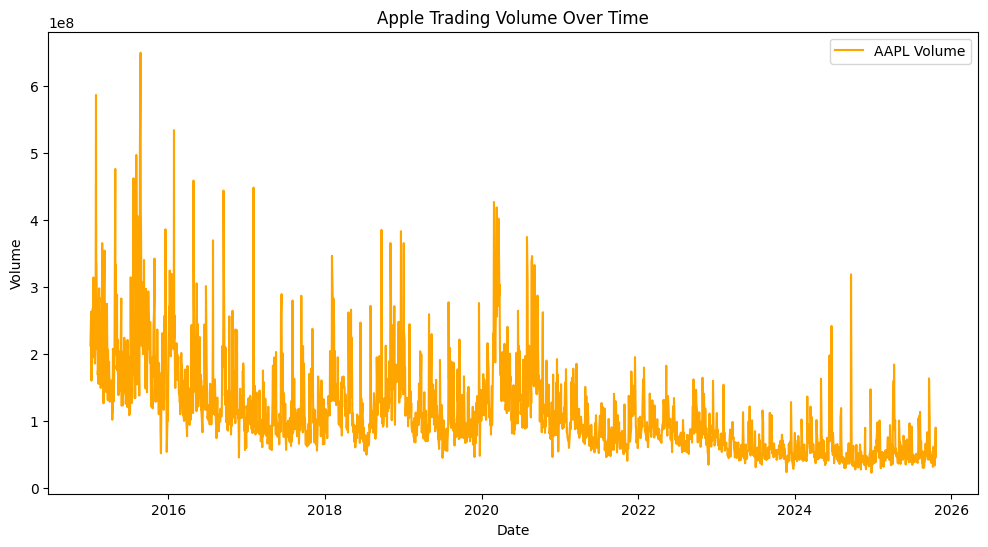

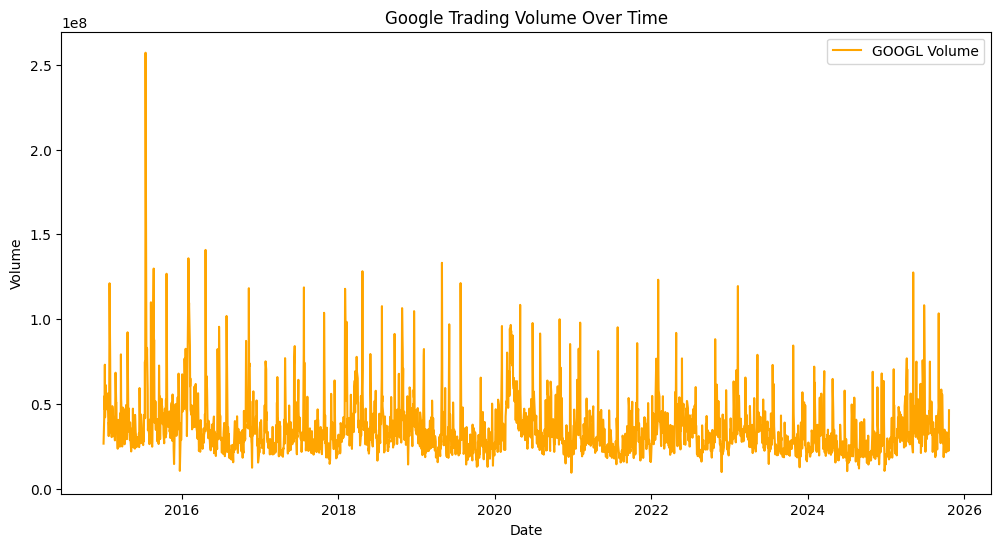

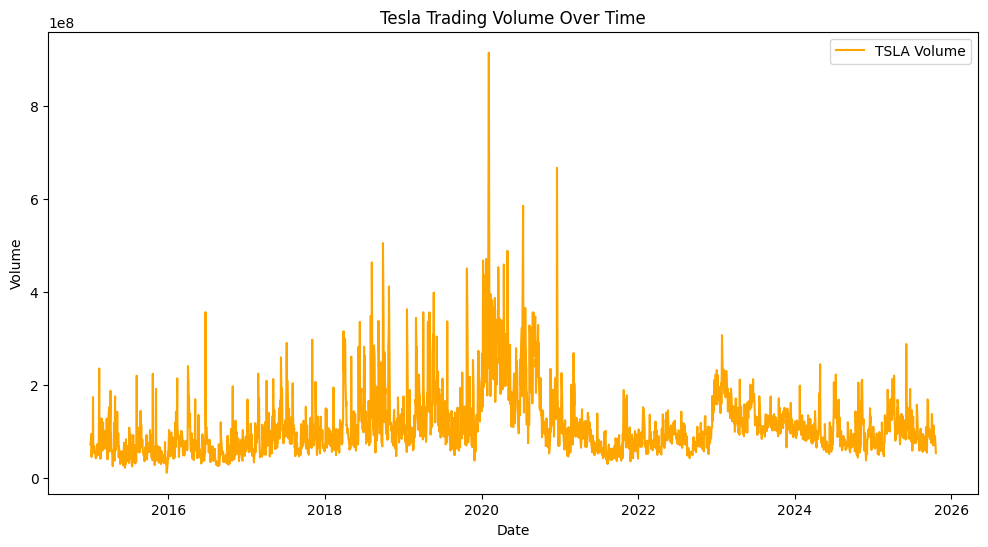

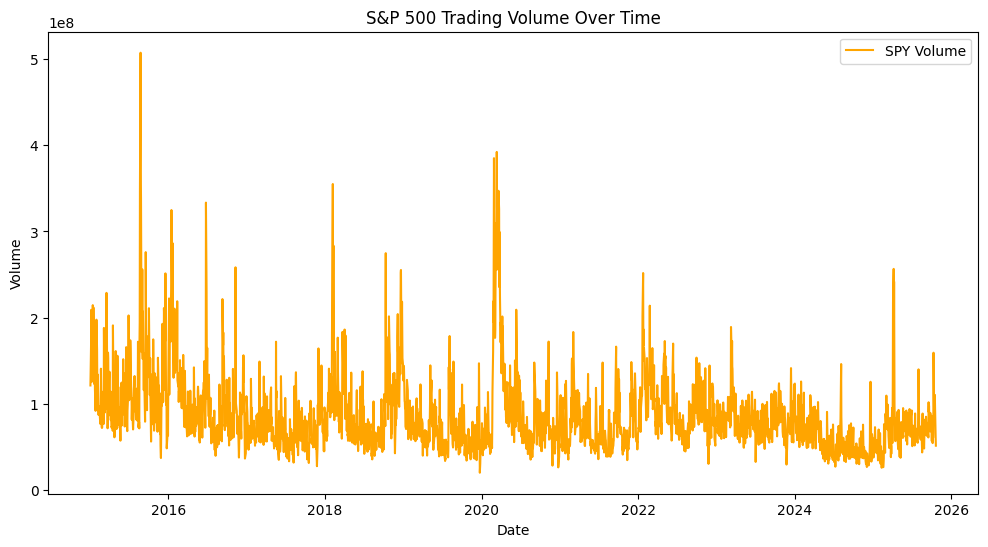

In [ ]:
#Trading Volume
plt.figure(figsize=(12,6))
plt.plot(amzn["Date"], amzn["Volume"], label="AMZN Volume", color="orange")
plt.title("Amazon Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()


plt.figure(figsize=(12,6))
plt.plot(aapl["Date"], aapl["Volume"], label="AAPL Volume", color="orange")
plt.title("Apple Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()




#Trading Volume
plt.figure(figsize=(12,6))
plt.plot(googl["Date"], googl["Volume"], label="GOOGL Volume", color="orange")
plt.title("Google Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()




#Trading Volume
plt.figure(figsize=(12,6))
plt.plot(tsla["Date"], tsla["Volume"], label="TSLA Volume", color="orange")
plt.title("Tesla Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()




#Trading Volume
plt.figure(figsize=(12,6))
plt.plot(spy["Date"], spy["Volume"], label="SPY Volume", color="orange")
plt.title("S&P 500 Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

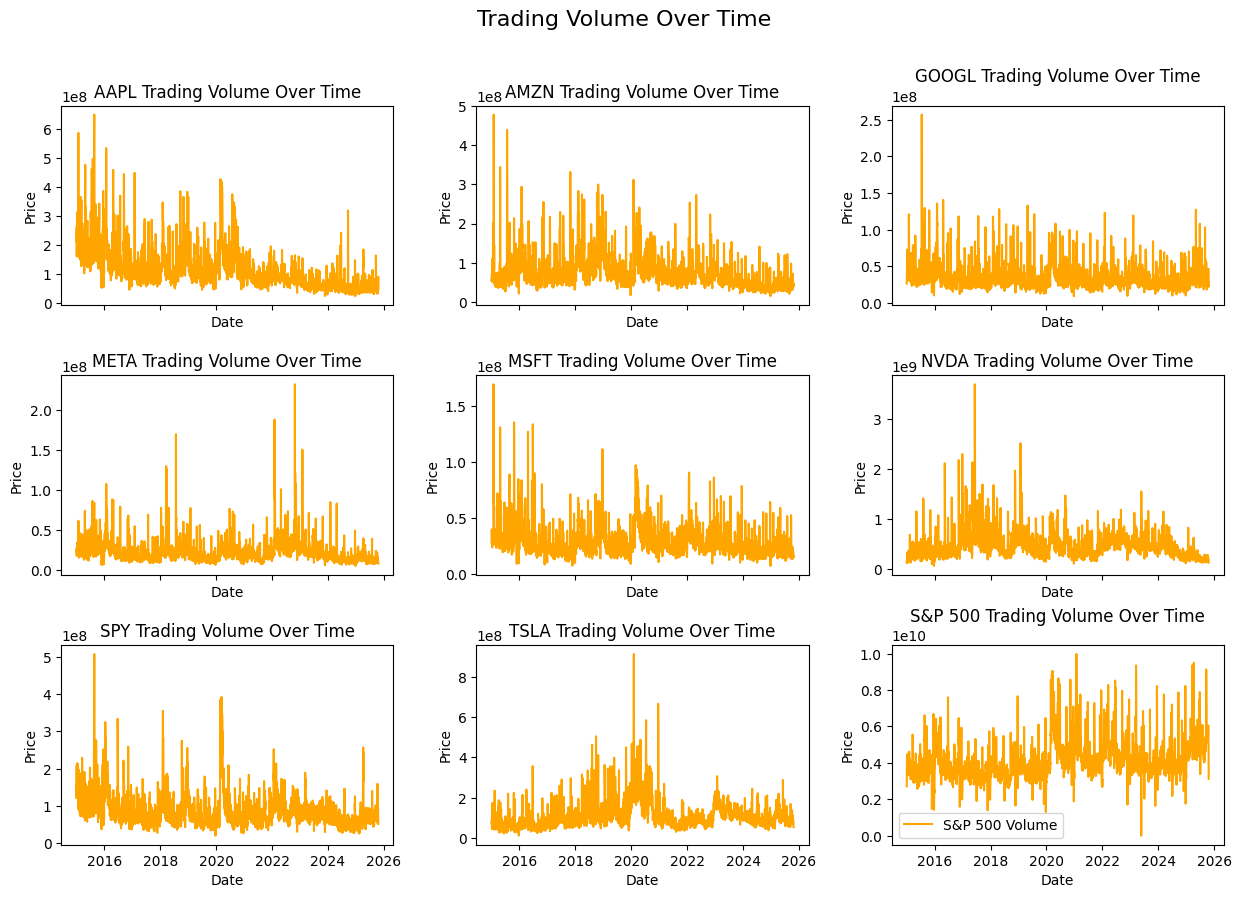

In [ ]:
#Trading Volume
tickers = stacked["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
  ax = axes[i]
  temp = stacked[stacked["Ticker"] == t].copy()
  ax.plot(temp["Date"], temp["Volume"], label=f"{t} Volume", color="orange")
  ax.set_title(f"{t} Trading Volume Over Time")
  ax.set_xlabel("Date")
  ax.set_ylabel("Price")

fig.suptitle("Trading Volume Over Time", fontsize=16, y=0.98)
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.legend()
plt.show()

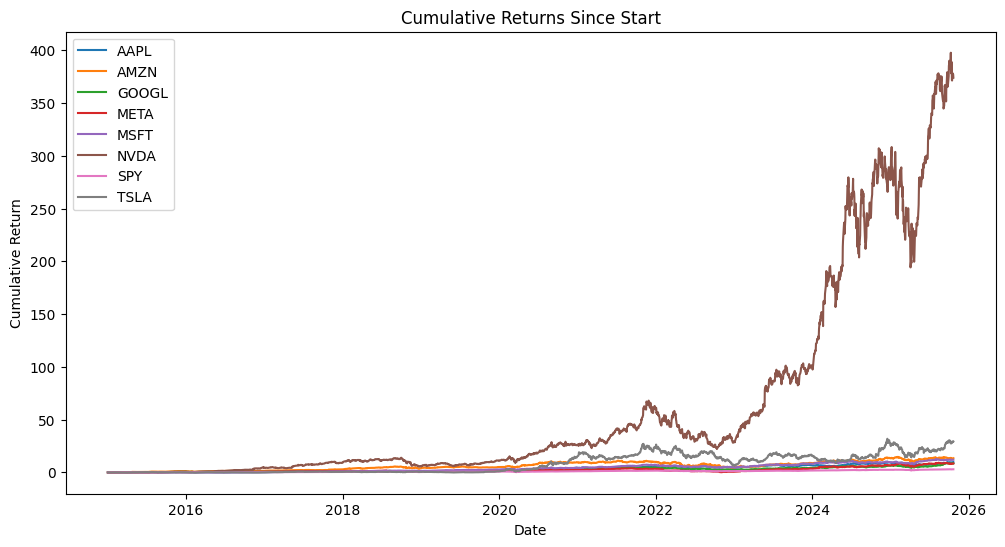

In [ ]:
plt.figure(figsize=(12,6))
for t in all_tickers_no_sp:
    sub = stacked[stacked["Ticker"] == t].sort_values("Date").copy()
    sub["Return"] = sub["Close"].pct_change()
    sub["CumRet"] = (1 + sub["Return"].fillna(0)).cumprod() - 1
    plt.plot(sub["Date"], sub["CumRet"], label=t)

plt.title("Cumulative Returns Since Start")
plt.xlabel("Date"); plt.ylabel("Cumulative Return")
plt.legend(); plt.show()

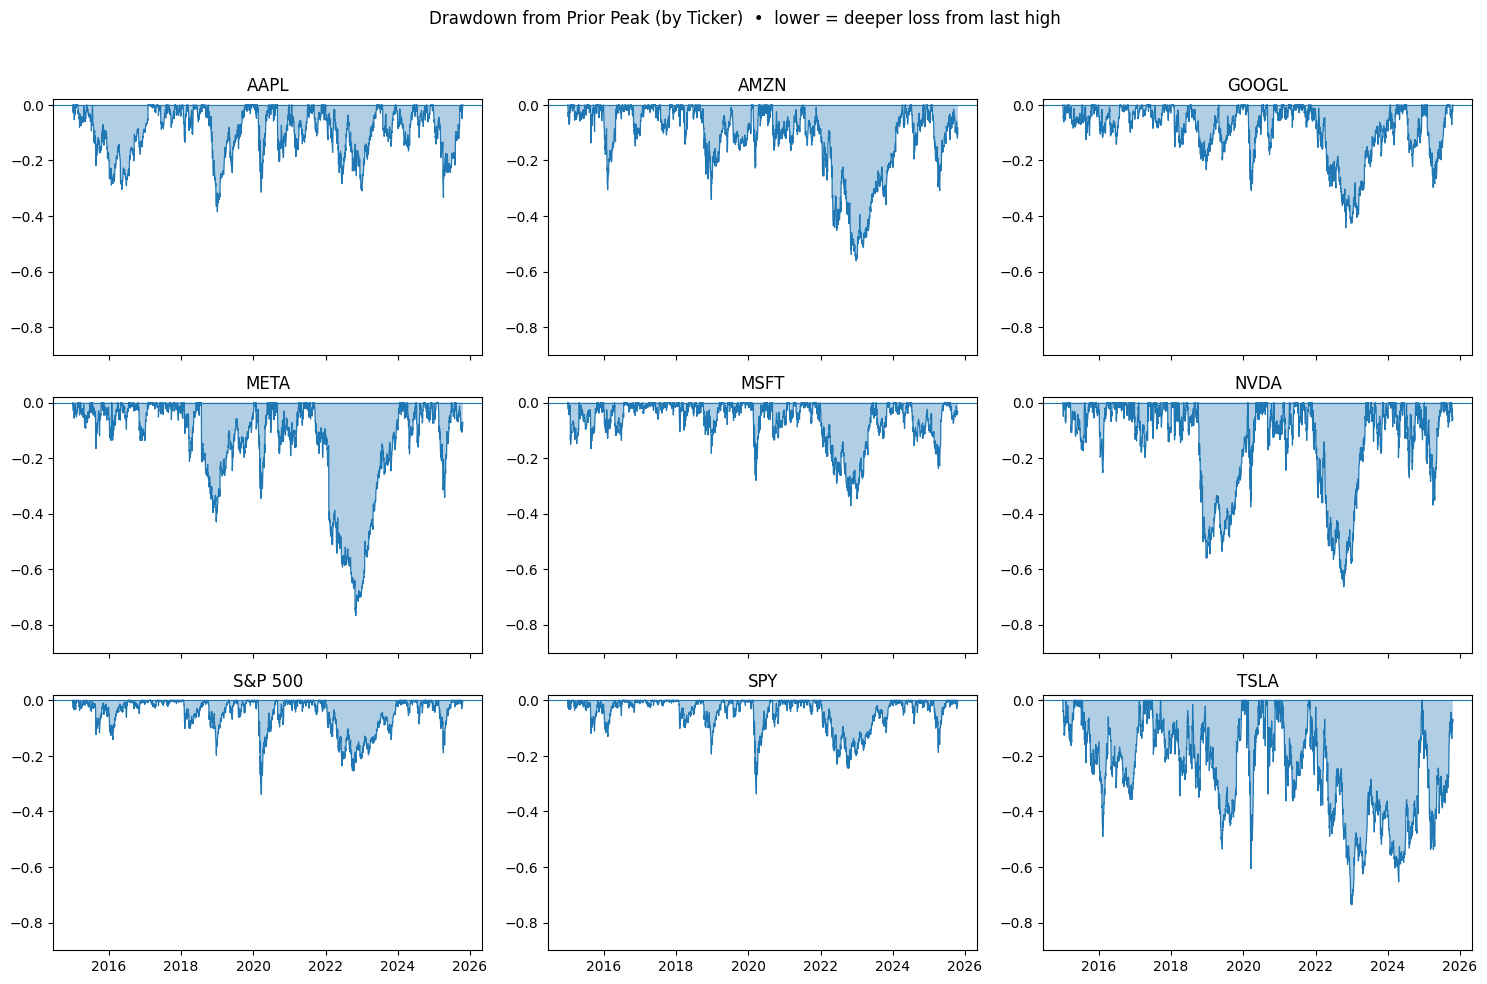

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# --- Setup: ensure datetime + find price column ---
stacked["Date"] = pd.to_datetime(stacked["Date"])
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Compute drawdown per ticker ---
df = stacked.sort_values(["Ticker", "Date"]).copy()
df["CumMax"] = df.groupby("Ticker")[price_col].cummax()
df["Drawdown"] = df[price_col] / df["CumMax"] - 1  # (price / peak) - 1  → 0 at peaks, negative when below
""
# --- Small multiples: one subplot per ticker ---
tickers = df["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
    ax = axes[i]
    sub = df[df["Ticker"] == t].sort_values("Date").copy()
    sub = sub.dropna(subset=["Drawdown"])
    # area + line so dips are obvious
    ax.fill_between(sub["Date"], sub["Drawdown"], 0, step="pre", alpha=0.35)
    ax.plot(sub["Date"], sub["Drawdown"], linewidth=0.9)
    ax.axhline(0, linewidth=0.8)
    ax.set_title(t)
    ax.set_ylim(min(-0.9, sub["Drawdown"].min()), 0.02)  # cap top slightly above 0

# Hide any empty axes
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Drawdown from Prior Peak (by Ticker)  •  lower = deeper loss from last high", y=1.02)
plt.tight_layout()
plt.show()


drawdown plot shows when each stock was furthest below its recent peak so we can line those dips up with specific headlines.This helps us see if lots of news or bad headlines line up with bigger drops and slower recoveries or even happen right before them.

In [ ]:
!pip -q install kagglehub

import os, shutil, kagglehub

src_path = kagglehub.dataset_download("notlucasp/financial-news-headlines")
print("KaggleHub cached at:", src_path)

dst_dir = "/content/news_data"
shutil.copytree(src_path, dst_dir, dirs_exist_ok=True)


100%|██████████| 3.91M/3.91M [00:00<00:00, 4.37MB/s]

Extracting files...


KaggleHub cached at: /root/.cache/kagglehub/datasets/notlucasp/financial-news-headlines/versions/2


'/content/news_data'

In [ ]:
# === Recreate `stacked` if it's missing ===
import pandas as pd, yfinance as yf

# Use your tickers; edit if needed
TICKERS = ["AAPL","MSFT","GOOGL","AMZN","META","NVDA","TSLA","SPY"]
START, END = "2015-01-01", None

if "stacked" not in globals():
    # Reuse existing yfinance output if present; otherwise download
    if "data" not in globals():
        data = yf.download(" ".join(TICKERS), start=START, end=END,
                           auto_adjust=False, actions=False, progress=False)

    # Convert yfinance wide (MultiIndex columns) -> long format with Date/Ticker columns
    if isinstance(data.columns, pd.MultiIndex):
        stacked = (
            data.stack(level=-1)
                .rename_axis(index=["Date","Ticker"])
                .reset_index()
                .sort_values(["Ticker","Date"])
        )
    else:

        df = data.reset_index().copy()
        df["Ticker"] = TICKERS[0]
        stacked = df.sort_values(["Ticker","Date"])



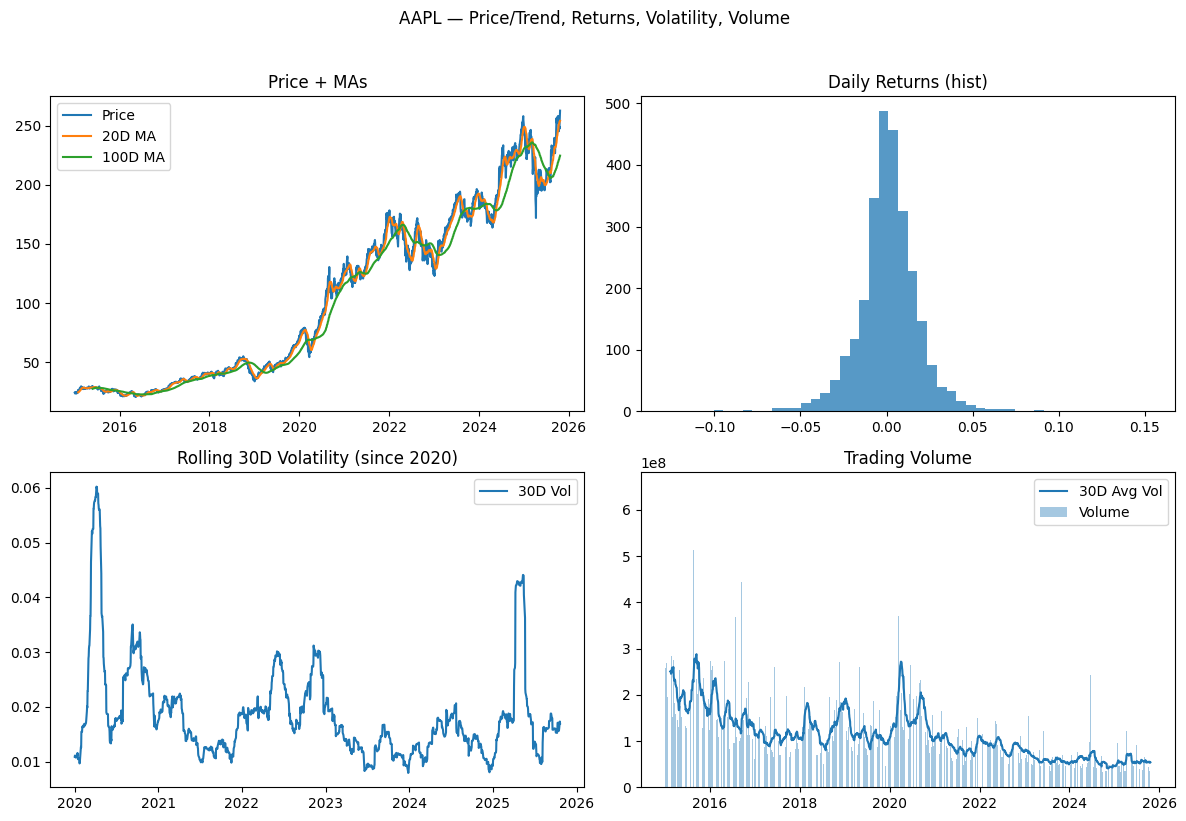

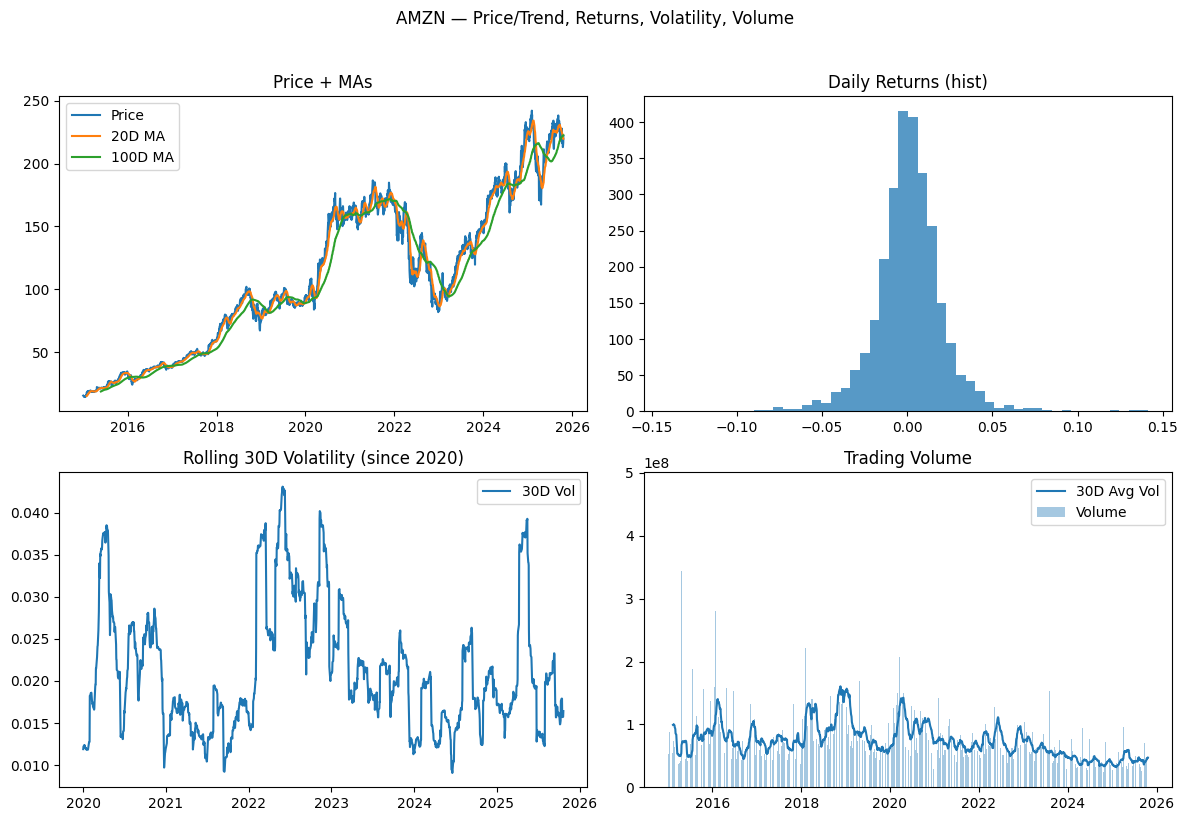

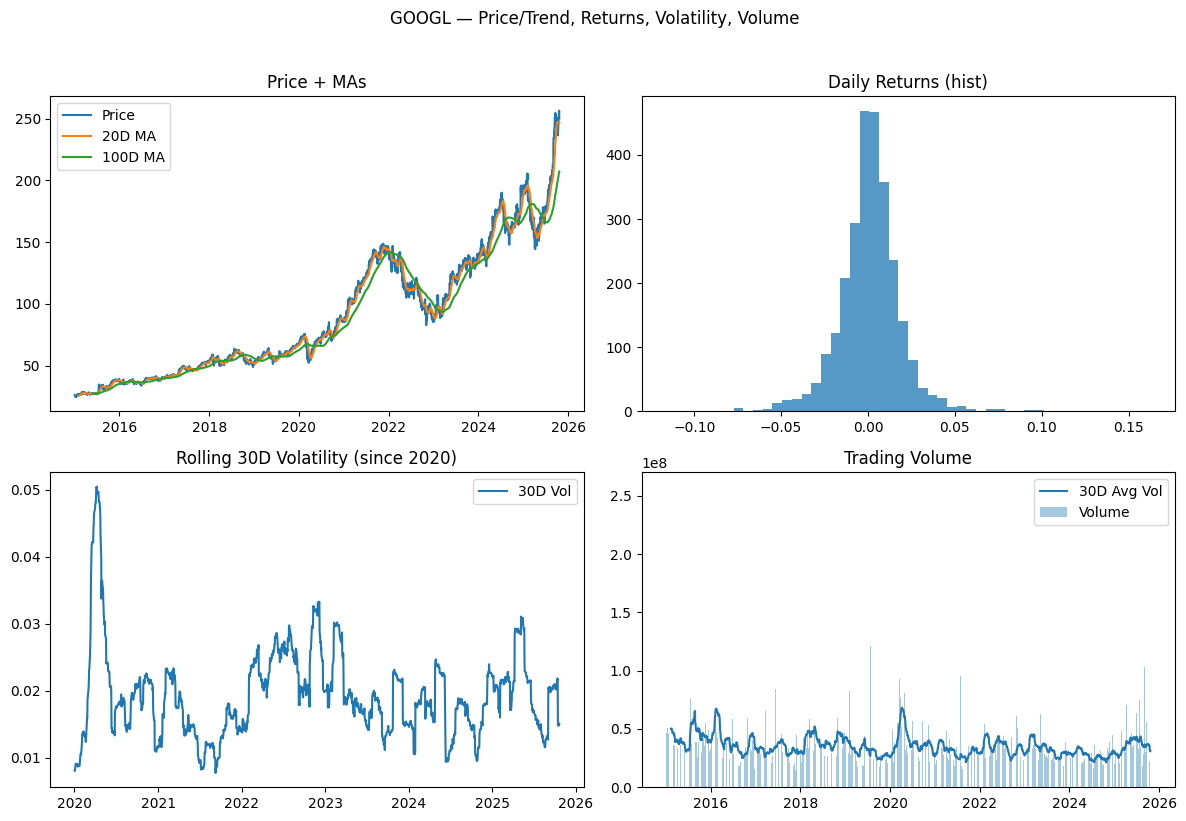

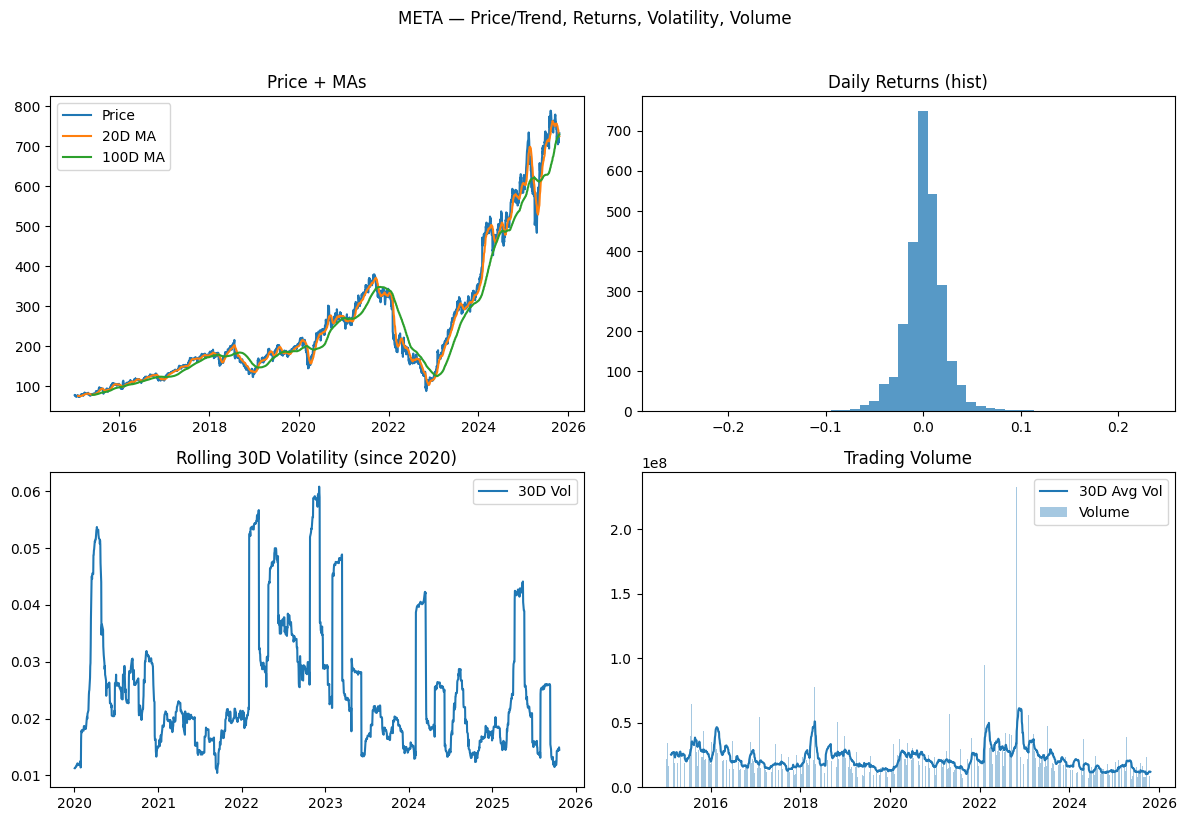

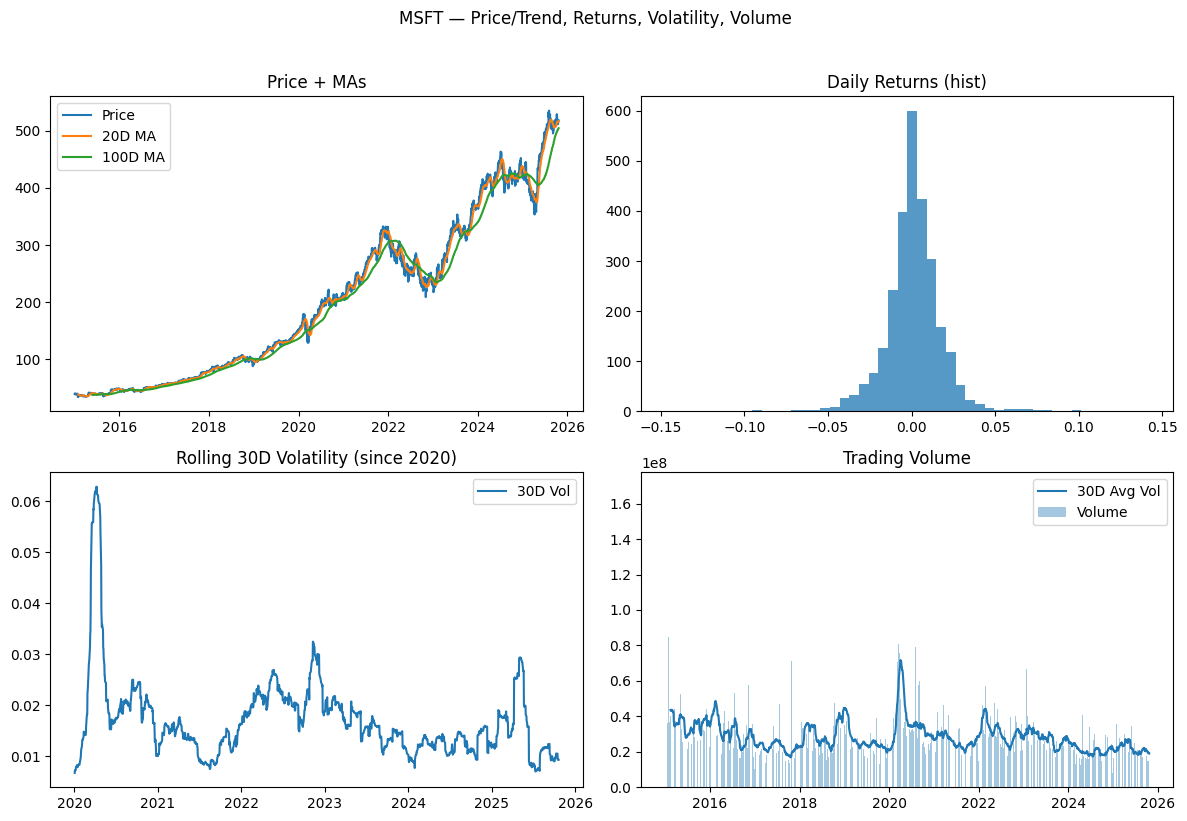

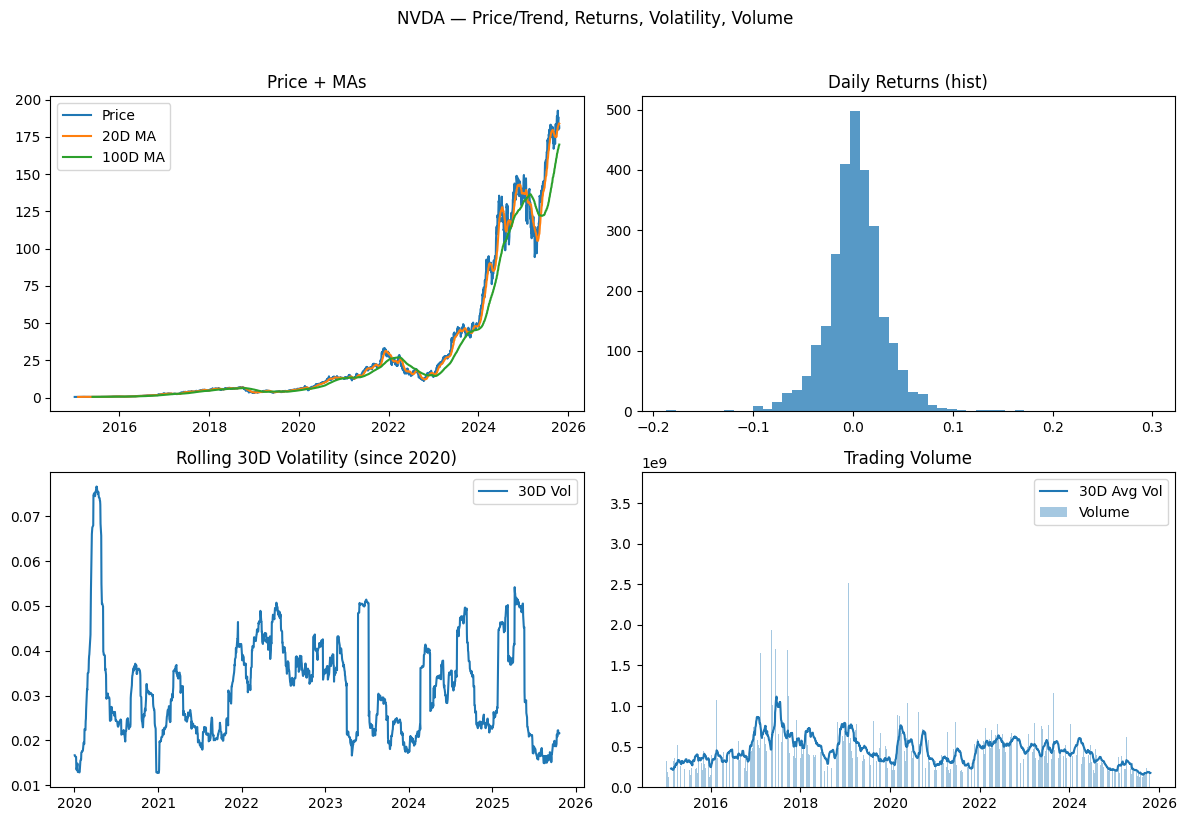

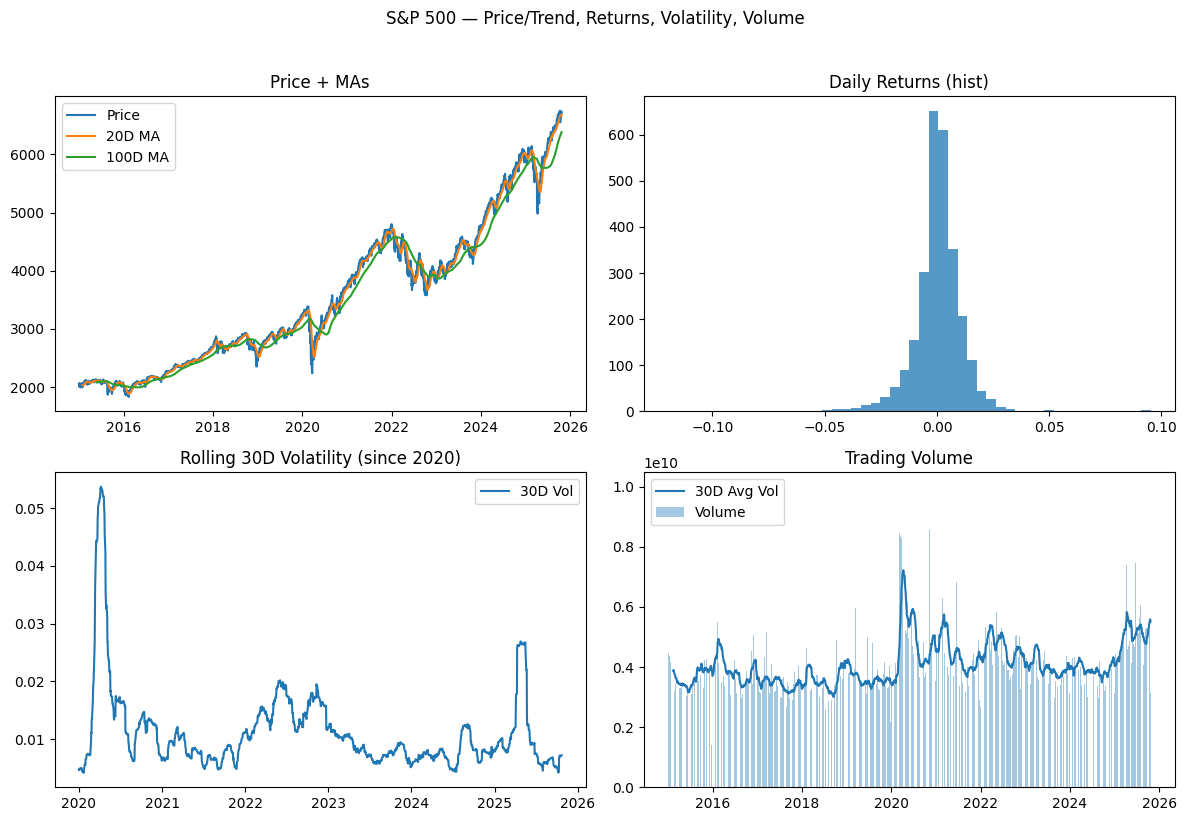

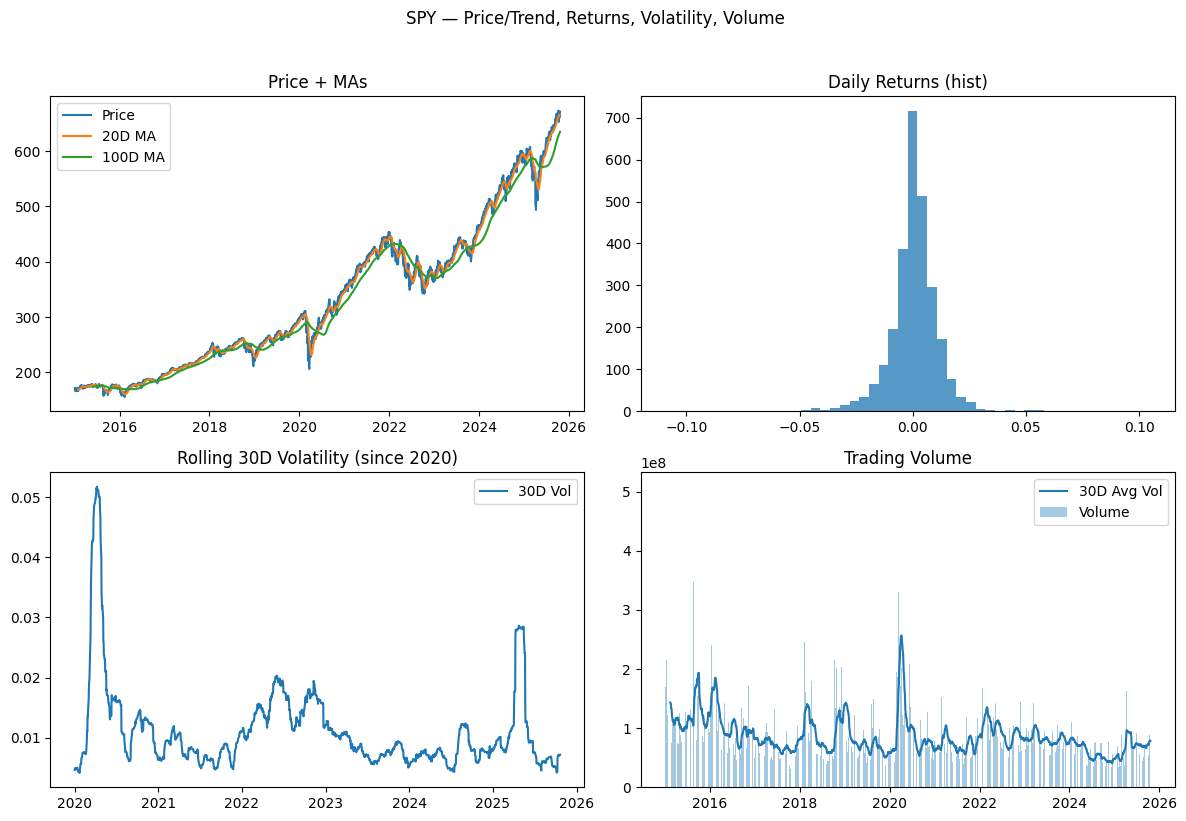

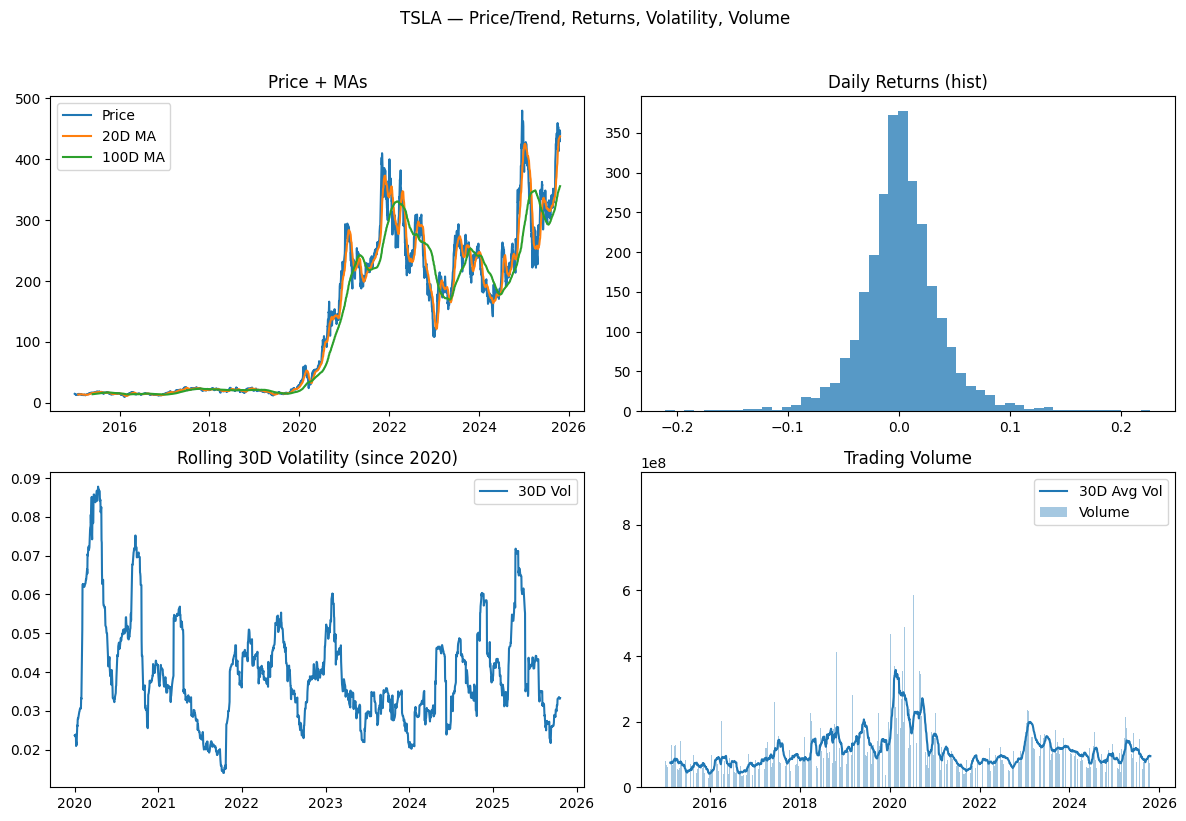

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Prep ---
stacked = stacked.copy()
stacked["Date"] = pd.to_datetime(stacked["Date"])

# find price column
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# daily returns (if not already there)
if "Return" not in stacked.columns:
    stacked = stacked.sort_values(["Ticker","Date"])
    stacked["Return"] = stacked.groupby("Ticker")[price_col].pct_change()

# loop all tickers and plot the 4 mini-charts
for T in sorted(stacked["Ticker"].unique()):
    sub = stacked[stacked["Ticker"] == T].sort_values("Date").copy()
    sub["MA20"]   = sub[price_col].rolling(20).mean()
    sub["MA100"]  = sub[price_col].rolling(100).mean()
    sub["Vol30"]  = sub["Return"].rolling(30).std()
    if "Volume" in sub.columns:
        sub["VolMA30"] = sub["Volume"].rolling(30).mean()
    else:
        sub["VolMA30"] = np.nan

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"{T} — Price/Trend, Returns, Volatility, Volume", y=1.02)

    # Price + moving averages
    ax = axes[0,0]
    ax.plot(sub["Date"], sub[price_col], label="Price")
    ax.plot(sub["Date"], sub["MA20"],  label="20D MA")
    ax.plot(sub["Date"], sub["MA100"], label="100D MA")
    ax.set_title("Price + MAs"); ax.legend()

    # Returns histogram
    ax = axes[0,1]
    ax.hist(sub["Return"].dropna(), bins=50, alpha=0.75)
    ax.set_title("Daily Returns (hist)")

    # Rolling 30D volatility (zoom recent)
    ax = axes[1,0]
    recent = sub[sub["Date"] >= "2020-01-01"]
    ax.plot(recent["Date"], recent["Vol30"], label="30D Vol")
    ax.set_title("Rolling 30D Volatility (since 2020)"); ax.legend()

    # Volume + 30D avg
    ax = axes[1,1]
    if "Volume" in sub.columns:
        ax.bar(sub["Date"], sub["Volume"], alpha=0.4, label="Volume")
        ax.plot(sub["Date"], sub["VolMA30"], label="30D Avg Vol")
        ax.set_title("Trading Volume"); ax.legend()
    else:
        ax.text(0.5, 0.5, "No Volume column", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd


if "df" not in globals():
    # Minimal fallback: build labels from `stacked` if needed
    assert "stacked" in globals(), "Run the cell that builds `stacked` or `df` first."
    df = stacked.copy()
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values(["Ticker","Date"])
    g = df.groupby("Ticker")
    # Targets
    df["y_open_t1"]   = g["Open"].shift(-1)
    df["y_ret_oo_t1"] = (g["Open"].shift(-1) / df["Open"]) - 1

# --- Find the S&P 500 ticker in your data ---
sp_candidates = ["S&P 500", "^GSPC", "SPX", "SP500", "SP-500", "SPY"]  # try index and SPY proxy
tickers = df["Ticker"].astype(str).unique().tolist()

chosen = None
for cand in sp_candidates:
    for t in tickers:
        if t.strip().lower() == cand.strip().lower():
            chosen = t
            break
    if chosen:
        break

if chosen is None:
    raise ValueError(f"Couldn't find an S&P 500 ticker in {tickers}. Try adding '^GSPC' or SPY.")

# --- Define label columns and optional direction label ---
label_cols = [c for c in df.columns if c.startswith("y_")]
if "y_ret_oo_t1" in df.columns and "y_dir_t1" not in df.columns:
    df["y_dir_t1"] = (df["y_ret_oo_t1"] > 0).astype(int)  # 1=up, 0=down
    label_cols = label_cols + ["y_dir_t1"]

# --- Print results ---
sp_labels = df[df["Ticker"] == chosen][["Date","Ticker"] + label_cols].dropna(subset=label_cols)
print(f"Using ticker: {chosen}")
print("Label columns:", label_cols)
print(sp_labels.tail(10))  # show recent label values

#  class balance for the up/down label
if "y_dir_t1" in sp_labels.columns:
    counts = sp_labels["y_dir_t1"].value_counts().rename(index={0:"down",1:"up"})
    print("Up/Down counts:", dict(counts))

Using ticker: S&P 500
Label columns: []
Price       Date   Ticker
24371 2025-10-08  S&P 500
24380 2025-10-09  S&P 500
24389 2025-10-10  S&P 500
24398 2025-10-13  S&P 500
24407 2025-10-14  S&P 500
24416 2025-10-15  S&P 500
24425 2025-10-16  S&P 500
24434 2025-10-17  S&P 500
24443 2025-10-20  S&P 500
24452 2025-10-21  S&P 500


In [ ]:
# Kaggle Data loading and putting in the content folder
!pip -q install kagglehub

import os, shutil, kagglehub

src_path = kagglehub.dataset_download("notlucasp/financial-news-headlines")
print("KaggleHub cached at:", src_path)

dst_dir = "/content/news_data"
shutil.copytree(src_path, dst_dir, dirs_exist_ok=True)


Using Colab cache for faster access to the 'financial-news-headlines' dataset.
KaggleHub cached at: /kaggle/input/financial-news-headlines


Error: [('/kaggle/input/financial-news-headlines/.nfs000000003a72efa80000003a', '/content/news_data/.nfs000000003a72efa80000003a', "[Errno 13] Permission denied: '/kaggle/input/financial-news-headlines/.nfs000000003a72efa80000003a'")]

In [ ]:
cnbc = pd.read_csv('news_data/cnbc_headlines.csv')
guardian = pd.read_csv('news_data/guardian_headlines.csv')
reuters = pd.read_csv('news_data/reuters_headlines.csv')

In [ ]:
PATTERNS = {
    "AAPL":  r'(?<![A-Z0-9])\$?AAPL(?![A-Z0-9])|\bApple\b',
    "MSFT":  r'(?<![A-Z0-9])\$?MSFT(?![A-Z0-9])|\bMicrosoft\b',
    "GOOGL": r'(?<![A-Z0-9])\$?(?:GOOGL|GOOG)(?![A-Z0-9])|\b(?:Alphabet|Google)\b',
    "AMZN":  r'(?<![A-Z0-9])\$?AMZN(?![A-Z0-9])|\bAmazon\b',
    # acoid the common meta
    "META":  r'(?<![A-Z0-9])\$?META(?![A-Z0-9])|\bMeta Platforms?\b|\bFacebook\b',
    "NVDA":  r'(?<![A-Z0-9])\$?NVDA(?![A-Z0-9])|\bNVIDIA\b',
    "TSLA":  r'(?<![A-Z0-9])\$?TSLA(?![A-Z0-9])|\bTesla\b',
    "SPY":   r'(?<![A-Z0-9])\$?SPY(?![A-Z0-9])|\bSPDR\s+S&P\s*500\s+ETF(?:\s+Trust)?\b',
    "S&P500": r'(?:\^GSPC)|\bS&P\s*500\b'
}

def one_hot_companies(text_series: pd.Series,
                      patterns: dict = PATTERNS) -> pd.DataFrame:
    """
    input: the series of the text of the news
    out: the one-hot DataFrame of the news
    """
    out = {}
    for tick, pat in patterns.items():
        out[tick] = (
            text_series.str.contains(pat, flags=re.IGNORECASE, regex=True, na=False)
            .astype('int8')
        )
    return pd.DataFrame(out, index=text_series.index)


In [ ]:
import re

cnbc_oh = one_hot_companies(cnbc['Headlines'])
guardian_oh = one_hot_companies(guardian['Headlines'])
reuters_oh = one_hot_companies(reuters['Headlines'])
# cnbc.loc[0]
cnbc = cnbc.join(cnbc_oh)
TICKERS[-1] = 'S&P500'
guardian = guardian.join(guardian_oh)
reuters = reuters.join(reuters_oh)

In [ ]:
cnbc_tickers = cnbc[cnbc[TICKERS].any(axis=1)]
guardian_tickers = guardian[guardian[TICKERS].any(axis=1)]
reuters_tickers = reuters[reuters[TICKERS].any(axis=1)]

#data cleaning for headlines -----
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_headline(text: str) -> str:
    """Clean and normalize a single news headline."""
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = [w for w in text.split() if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

# Apply cleaning to all three datasets
for df in [cnbc_tickers, guardian_tickers, reuters_tickers]:
    df["Clean_Headlines"] = df["Headlines"].apply(clean_headline)


In [ ]:
import re

M = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

PAT1 = re.compile(r'\b([A-Za-z]{3})\s+(\d{1,2})\s+(\d{4})\b')        # Jul 18 2020
PAT2 = re.compile(r'\b(\d{1,2})-([A-Za-z]{3})-(\d{2,4})\b')          # 18-Dec-17/2017
PAT3 = re.compile(r'\b(\d{1,2})\s+([A-Za-z]{3})\s+(\d{4})\b')        # ... Tue, 2 Jan 2018

def norm_y(y): y=int(y); return (2000+y if y<70 else 1900+y) if y<100 else y
def iso(s:str):
    if ',' in s:
      s = s.split(',')[-1]
    if not isinstance(s,str): return None
    for p in (PAT1,PAT2,PAT3):
        m=p.search(s);
        if m:
            a,b,c=m.groups()
            if p is PAT1: mth,day,yr=a,b,c
            elif p is PAT2: day,mth,yr=a,b,c
            else: day,mth,yr=a,b,c
            mnum=M.get(mth.lower(),None)
            if not mnum: return None
            return f"{norm_y(yr):04d}-{mnum:02d}-{int(day):02d}"
    return None

cnbc_tickers['Date']= cnbc_tickers['Time'].map(iso);
guardian_tickers['Date']= guardian_tickers['Time'].map(iso);
reuters_tickers['Date']= reuters_tickers['Time'].map(iso);

In [ ]:
cnbc_tickers

In [ ]:
guardian_tickers

In [ ]:
reuters_tickers

In [ ]:
# Baseline Logistic Regrassion Model - J

import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- final merged dataset ---
df = final.copy()

# --- Clean up and drop missing text or return values ---
df = df.dropna(subset=["Clean_Headlines", "Return"])

# --- Create binary label: 1 = next-day price up, 0 = down ---
df["Direction"] = (df["Return"] > 0).astype(int)

# --- Split train/test ---
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Direction"])

# --- TF-IDF vectorization of text headlines ---
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train = tfidf.fit_transform(train["Clean_Headlines"])
X_test  = tfidf.transform(test["Clean_Headlines"])

y_train, y_test = train["Direction"], test["Direction"]

# --- Train logistic regression baseline ---
model = LogisticRegression(max_iter=1000, n_jobs=-1)
model.fit(X_train, y_train)

# --- Predict ---
y_pred = model.predict(X_test)

# --- Evaluate performance ---
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
try:
    final = df.copy()
    print(" 'final' dataset created from df.")
except NameError:
    print(" No DataFrame named 'df' found. Please replace 'df' with your dataset name, e.g.:")
    print("   final = your_dataframe_name.copy()")

 'final' dataset created from df.


Available columns: ['Date', 'Ticker', 'Capital Gains', 'Close', 'Dividends', 'High', 'Low', 'Open', 'Stock Splits', 'Volume', 'Return']

Data sample:
Price       Date Ticker  Capital Gains      Close  Dividends       High  \
0     2015-01-02   AAPL            NaN  24.261051        0.0  24.729274   
9     2015-01-05   AAPL            NaN  23.577568        0.0  24.110144   
18    2015-01-06   AAPL            NaN  23.579794        0.0  23.839424   
27    2015-01-07   AAPL            NaN  23.910433        0.0  24.010290   
36    2015-01-08   AAPL            NaN  24.829121        0.0  24.886817   

Price        Low       Open  Stock Splits     Volume    Return  
0      23.821675  24.718178           0.0  212818400       NaN  
9      23.391167  24.030258           0.0  257142000 -0.028172  
18     23.218085  23.641928           0.0  263188400  0.000094  
27     23.677430  23.788384           0.0  160423600  0.014022  
36     24.121238  24.238850           0.0  237458000  0.038422  
Original 

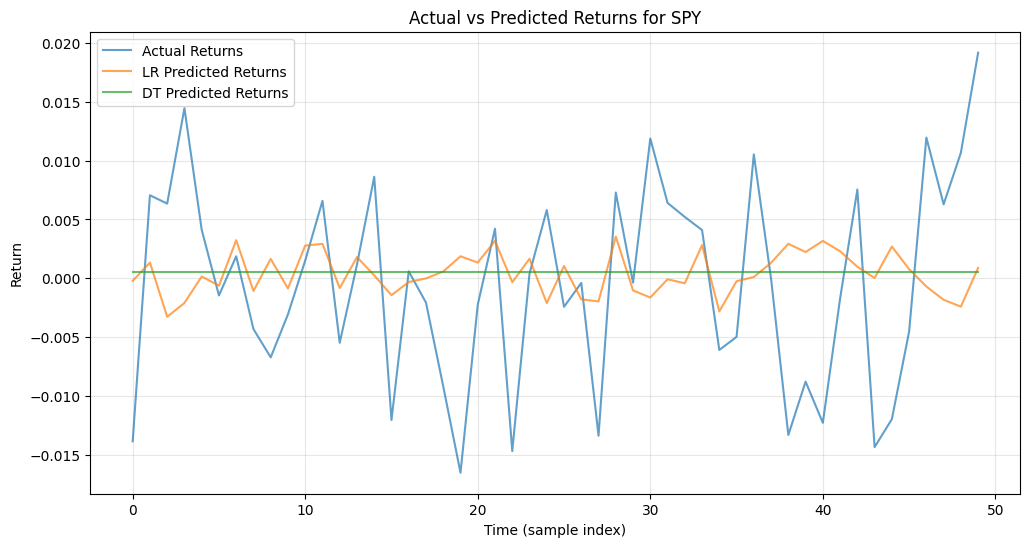

In [ ]:
# Shambhavi Baseline Model LR and DT

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = stacked.copy()

print("Available columns:", df.columns.tolist())
print("\nData sample:")
print(df.head())

# Create features for stock prediction
# Sort by Ticker and Date to ensure proper order
df = df.sort_values(['Ticker', 'Date'])

# Calculate returns and other features
df['Return'] = df.groupby('Ticker')['Close'].pct_change()
df['Volume_Change'] = df.groupby('Ticker')['Volume'].pct_change()

# Create lagged features (previous day's values)
for lag in [1, 2, 3, 5]:
    df[f'Close_Lag_{lag}'] = df.groupby('Ticker')['Close'].shift(lag)
    df[f'Volume_Lag_{lag}'] = df.groupby('Ticker')['Volume'].shift(lag)
    df[f'Return_Lag_{lag}'] = df.groupby('Ticker')['Return'].shift(lag)

# Calculate simple moving averages
for window in [5, 10, 20]:
    df[f'SMA_{window}'] = df.groupby('Ticker')['Close'].transform(
        lambda x: x.rolling(window=window, min_periods=1).mean()
    )

# Calculate price range (High - Low)
df['Price_Range'] = df['High'] - df['Low']

# Target variable: Next day's return (for regression)
df['Target_Return'] = df.groupby('Ticker')['Return'].shift(-1)

# Drop rows with NaN values created by lag features and target
df_clean = df.dropna().reset_index(drop=True)  # Reset index to avoid issues

print(f"Original dataset shape: {df.shape}")
print(f"Clean dataset shape: {df_clean.shape}")

# --- Select target and features ---
TARGET = 'Target_Return'

# Feature columns (excluding identifiers and targets)
exclude_cols = ['Date', 'Ticker', 'Target_Return', 'Return']
feature_cols = [col for col in df_clean.columns
                if col not in exclude_cols and df_clean[col].dtype in [np.int64, np.float64]]

print(f"\nUsing {len(feature_cols)} features: {feature_cols}")

# Prepare feature matrix and target vector
X = df_clean[feature_cols]
y = df_clean[TARGET]

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# --- Train/test split ---
# Split by time to avoid lookahead bias - use earlier data for training, later for testing
split_ratio = 0.8
split_point = int(len(df_clean) * split_ratio)

X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

print(f"\nTraining set: {X_train.shape[0]} samples (first {split_ratio:.0%} of data)")
print(f"Test set: {X_test.shape[0]} samples (last {1-split_ratio:.0%} of data)")

# Also store the ticker information for the test set
test_tickers = df_clean.iloc[split_point:]['Ticker'].reset_index(drop=True)

# --- Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Models ---
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10)
}

# --- Train and evaluate ---
results = []

for name, model in models.items():
    print(f"\n--- Training {name} ---")

    # Train model
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    })

    print(f"{name} -> MAE: {mae:.6f} | RMSE: {rmse:.6f} | R²: {r2:.4f}")

# --- Display results ---
results_df = pd.DataFrame(results)
print("\n" + "="*50)
print("BASELINE STOCK PRICE PREDICTION RESULTS")
print("="*50)
print(results_df)

# --- Additional analysis: Check performance by ticker ---
print("\n" + "="*50)
print("PERFORMANCE BY TICKER")
print("="*50)

# Create test results dataframe with proper indexing
test_results = X_test.copy().reset_index(drop=True)
test_results['Ticker'] = test_tickers
test_results['Actual'] = y_test.reset_index(drop=True).values

# Add predictions
test_results['Pred_LR'] = models['Linear Regression'].predict(X_test_scaled)
test_results['Pred_DT'] = models['Decision Tree'].predict(X_test)

# Evaluate by ticker
ticker_results = []
for ticker in test_results['Ticker'].unique():
    ticker_data = test_results[test_results['Ticker'] == ticker]

    if len(ticker_data) > 0:  # Only calculate if we have data
        lr_mae = mean_absolute_error(ticker_data['Actual'], ticker_data['Pred_LR'])
        dt_mae = mean_absolute_error(ticker_data['Actual'], ticker_data['Pred_DT'])

        ticker_results.append({
            'Ticker': ticker,
            'Samples': len(ticker_data),
            'LR_MAE': lr_mae,
            'DT_MAE': dt_mae
        })

ticker_df = pd.DataFrame(ticker_results)
print(ticker_df)

# --- Feature importance for Decision Tree ---
print("\n" + "="*50)
print("DECISION TREE FEATURE IMPORTANCE (Top 10)")
print("="*50)

feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': models['Decision Tree'].feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

# --- Simple analysis of predictions ---
print("\n" + "="*50)
print("PREDICTION ANALYSIS")
print("="*50)

# Basic statistics of predictions vs actuals
print("Actual Returns Statistics:")
print(f"  Mean: {y_test.mean():.6f}")
print(f"  Std:  {y_test.std():.6f}")
print(f"  Min:  {y_test.min():.6f}")
print(f"  Max:  {y_test.max():.6f}")

print("\nLinear Regression Predictions Statistics:")
print(f"  Mean: {test_results['Pred_LR'].mean():.6f}")
print(f"  Std:  {test_results['Pred_LR'].std():.6f}")

# Correlation between predictions and actuals
lr_corr = np.corrcoef(test_results['Actual'], test_results['Pred_LR'])[0,1]
dt_corr = np.corrcoef(test_results['Actual'], test_results['Pred_DT'])[0,1]
print(f"\nCorrelation with actual returns:")
print(f"  Linear Regression: {lr_corr:.4f}")
print(f"  Decision Tree:     {dt_corr:.4f}")

import joblib

# Save models
joblib.dump(models['Linear Regression'], 'linear_regression_model.pkl')
joblib.dump(models['Decision Tree'], 'decision_tree_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\nModels saved to disk:")
print("- linear_regression_model.pkl")
print("- decision_tree_model.pkl")
print("- scaler.pkl")


import matplotlib.pyplot as plt

# Plot for a specific ticker
sample_ticker = test_results['Ticker'].iloc[0]
ticker_data = test_results[test_results['Ticker'] == sample_ticker]

if len(ticker_data) > 10:  # Only plot if we have enough data
    plt.figure(figsize=(12, 6))
    plt.plot(ticker_data['Actual'].values[:50], label='Actual Returns', alpha=0.7)
    plt.plot(ticker_data['Pred_LR'].values[:50], label='LR Predicted Returns', alpha=0.7)
    plt.plot(ticker_data['Pred_DT'].values[:50], label='DT Predicted Returns', alpha=0.7)
    plt.title(f'Actual vs Predicted Returns for {sample_ticker}')
    plt.xlabel('Time (sample index)')
    plt.ylabel('Return')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print(f"\nNot enough data to plot for {sample_ticker}")



Loads and preprocesses historical stock data (AAPL and SPY tickers)

Engineers features from raw price data (25 total features)

Trains two machine learning models:

Linear Regression

Decision Tree Regressor

     Chart
---------------------
image shows a comparison of actual vs predicted returns over time:

Blue line: Actual stock returns (real historical data)

Orange line: Linear Regression predictions

Green line: Decision Tree predictions

X-axis: Time (sample index from test set)

Y-axis: Return values (price changes as decimals)

The chart demonstrates how closely the model predictions track the actual price movements.

Results: Decision Tree performed better than Linear Regression